Author: Panu Khumchoo-Joonpijarn

Student ID: 23135551

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm

In [50]:
%matplotlib inline

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# EDA

## Introduction

The dataset being used in this study is from a journal detailing the "Global trends in dietary micronutrient supplies and estimated prevalence of inadequate intakes" between 1961 and 2011. The dataset uses a variety of figures to visualise the prevelance of inadequete intake of 14 micronutrients gloabally and makes the suggestion "at the gloabl level, micronutrients with the lowest levels of adequete estimated intake are calcium, iron, vitamin A, and zinc, but there are strong differences between countries and regions". This file aims to explore this statement, whether it is viable to apply a variety of Supervised Machine Learning Algorithms, in order to correctly predict and classify a record's global region.

[Dataset Link Figshare](https://figshare.com/articles/dataset/Global_trends_in_dietary_micronutrient_supplies_and_estimated_prevalence_of_inadequate_intakes/4866869?file=8102996)

[Journal Link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0175554) (Beal, T., Massiot, E., Arsenault, J.E., et al. (2017) Global trends in dietary micronutrient supplies and estimated prevalence of inadequate intakes. doi:10.1371/journal.pone.0175554.)

## About Micronutrient Dataset

1. Zone - Global Region the record is from.

2. Country - The country the record is sourced from.

3. ISO3 - The 3-letter code identifier for a country.

4. Year - The year in which the data record is collated from.

5. Population - The total population in the country record is sourced from.

6. Fortification - The addition of micronutrients to a nations food supplies

7. PCDEA - National per capita daily energy availability

8. MDI - Micronutrient Density Index for each country-year

9. Tagname - Abbreviated identifier for Micronutrient

10. Micronutrient - Identifies the specific Micronutrient data the record is refering to

11. Units - The measurement unit specified for micronuttrient

12. Estimated Intake - An estimate of micronutrient intake "per capita derived from FBS data by calculating coefficient of variation of intake based on within-subject variation from published dietary intake studies"

[Published dietry intake studies](https://doi.org/10.1371/journal.pone.0175554.s008)

13. Requirements - Refers to "Estimated average requirements (EARs) obtained by the Institue of Medicine for all nutrients except zinc, iron, and calcium"

14. Prevalence of Inadequate Intake - The result from the "EAR cut-point method to estimate based on approximated micronutrient intakes. It "relies on three assumptions: the distribution of intakes varies more than the distribution of requirements; the distribution of requirements is symmetrical; and intakes and requirements are not correlated".

In [53]:
#df = pd.read_csv('/content/drive/MyDrive/BCU/CMP5367/Coursework/S4Dataset.csv',index_col=False, encoding='ISO-8859-1')
#df = pd.read_csv(S4.Dataset.csv)
url = 'https://raw.githubusercontent.com/panuj456/MicronutrientCSV/refs/heads/main/S4Dataset.csv'
df = pd.read_csv(url,sep=",", encoding='cp1252')

Attempted to download from figshare directly but the csv format was changed to csv?etc.

[GitHub Raw](url)

[Solution to decode GitHub Raw](https://stackoverflow.com/questions/46000191/utf-8-codec-cant-decode-byte-0x92-in-position-18-invalid-start-byte)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111818 entries, 0 to 111817
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Zone                             111818 non-null  object 
 1   Country                          111818 non-null  object 
 2   ISO3                             111818 non-null  object 
 3   Year                             111818 non-null  int64  
 4   Population                       111818 non-null  float64
 5   Fortification                    111818 non-null  int64  
 6   PCDEA                            111818 non-null  int64  
 7   MDI                              111818 non-null  float64
 8   Tagname                          111818 non-null  object 
 9   Micronutrient                    111818 non-null  object 
 10  Units                            111818 non-null  object 
 11  Estimated Intake                 111818 non-null  float64
 12  Re

In [55]:
df.isna().sum()

Zone                               0
Country                            0
ISO3                               0
Year                               0
Population                         0
Fortification                      0
PCDEA                              0
MDI                                0
Tagname                            0
Micronutrient                      0
Units                              0
Estimated Intake                   0
Requirements                       0
Prevalence of Inadequate Intake    0
dtype: int64

In [56]:
df.dropna(inplace = True)

In [57]:
df.isna().sum()

Zone                               0
Country                            0
ISO3                               0
Year                               0
Population                         0
Fortification                      0
PCDEA                              0
MDI                                0
Tagname                            0
Micronutrient                      0
Units                              0
Estimated Intake                   0
Requirements                       0
Prevalence of Inadequate Intake    0
dtype: int64

In [58]:
df[df.duplicated()]

Empty DataFrame
Columns: [Zone, Country, ISO3, Year, Population, Fortification, PCDEA, MDI, Tagname, Micronutrient, Units, Estimated Intake, Requirements, Prevalence of Inadequate Intake]
Index: []

The dataset is clean, with no null or empty values, and no duplicated values.

In [59]:
df.describe(include=object)

Zone      Country    ISO3 Tagname Micronutrient   Units
count              111818       111818  111818  111818        111818  111818
unique                  8          170     170      14            14       2
top     Subsaharan Africa  Afghanistan     AFG    VITC     Vitamin C      mg
freq                29120          728     728    7987          7987   79870

In [60]:
corr = df[['MDI', 'Estimated Intake', 'Prevalence of Inadequate Intake']]
corr

MDI  Estimated Intake  Prevalence of Inadequate Intake
0       0.773239          0.040922                        62.746266
1       0.773239          0.001677                        58.326559
2       0.773239          0.000275                        84.225561
3       0.773239          0.700043                        63.814563
4       0.773239          0.001979                         0.090734
...          ...               ...                              ...
111813  0.709258          0.000209                        95.388542
111814  0.709258          0.000001                        33.580498
111815  0.709258          0.001168                        16.055914
111816  0.709258          0.033915                        81.059120
111817  0.709258          0.001359                        84.063915

[111818 rows x 3 columns]

In [61]:
#sns.heatmap(corr, annot = True)

sns.pairplot(df, hue='Prevalence of Inadequate Intake', height=2)

In [62]:
'''
#too long to process
sns.boxplot(data=df,x='Estimated Intake',y='Prevalence of Inadequate Intake',hue='MDI', palette="Set2" )
plt.title
plt.xlabel('Estimated Intake')
plt.ylabel('Prevalence of Inadequate Intake')
plt.xticks(rotation=45)
plt.show()
'''

'\n#too long to process\nsns.boxplot(data=df,x=\'Estimated Intake\',y=\'Prevalence of Inadequate Intake\',hue=\'MDI\', palette="Set2" )\nplt.title\nplt.xlabel(\'Estimated Intake\')\nplt.ylabel(\'Prevalence of Inadequate Intake\')\nplt.xticks(rotation=45)\nplt.show()\n'

sns.boxplot(data=df,x='',y='',hue='', palette="Set2" )
plt.title
plt.xlabel
plt.ylabel
plt.xticks(rotation=45)
plt.show()

In [63]:
df.shape

(111818, 14)

In [64]:
df.columns

Index(['Zone', 'Country', 'ISO3', 'Year', 'Population', 'Fortification',
       'PCDEA', 'MDI', 'Tagname', 'Micronutrient', 'Units', 'Estimated Intake',
       'Requirements', 'Prevalence of Inadequate Intake'],
      dtype='object')

In [65]:
df.head()

Zone      Country ISO3  Year  Population  Fortification  PCDEA       MDI  \
0  WCANA  Afghanistan  AFG  1961   8954000.0              0   2997  0.773239   
1  WCANA  Afghanistan  AFG  1961   8954000.0              0   2997  0.773239   
2  WCANA  Afghanistan  AFG  1961   8954000.0              0   2997  0.773239   
3  WCANA  Afghanistan  AFG  1961   8954000.0              0   2997  0.773239   
4  WCANA  Afghanistan  AFG  1961   8954000.0              0   2997  0.773239   

    Tagname Micronutrient Units  Estimated Intake  Requirements  \
0      VITC     Vitamin C    mg          0.040922      0.049955   
1        ZN          Zinc    mg          0.001677      0.001770   
2  VITA_RAE     Vitamin A   mcg          0.000275      0.000463   
3        CA       Calcium    mg          0.700043      0.783092   
4        CU        Copper   mcg          0.001979      0.000569   

   Prevalence of Inadequate Intake  
0                        62.746266  
1                        58.326559  
2                        84.225561  
3                        63.814563  
4                         0.090734

In [66]:
df.head(8).T

0            1            2  \
Zone                                   WCANA        WCANA        WCANA   
Country                          Afghanistan  Afghanistan  Afghanistan   
ISO3                                     AFG          AFG          AFG   
Year                                    1961         1961         1961   
Population                         8954000.0    8954000.0    8954000.0   
Fortification                              0            0            0   
PCDEA                                   2997         2997         2997   
MDI                                 0.773239     0.773239     0.773239   
Tagname                                 VITC           ZN     VITA_RAE   
Micronutrient                      Vitamin C         Zinc    Vitamin A   
Units                                     mg           mg          mcg   
Estimated Intake                    0.040922     0.001677     0.000275   
Requirements                        0.049955      0.00177     0.000463   
Prevalence of Inadequate Intake    62.746266    58.326559    84.225561   

                                           3            4            5  \
Zone                                   WCANA        WCANA        WCANA   
Country                          Afghanistan  Afghanistan  Afghanistan   
ISO3                                     AFG          AFG          AFG   
Year                                    1961         1961         1961   
Population                         8954000.0    8954000.0    8954000.0   
Fortification                              0            0            0   
PCDEA                                   2997         2997         2997   
MDI                                 0.773239     0.773239     0.773239   
Tagname                                   CA           CU         RIBF   
Micronutrient                        Calcium       Copper   Riboflavin   
Units                                     mg          mcg           mg   
Estimated Intake                    0.700043     0.001979      0.00125   
Requirements                        0.783092     0.000569     0.000828   
Prevalence of Inadequate Intake    63.814563     0.090734     4.437378   

                                           6            7  
Zone                                   WCANA        WCANA  
Country                          Afghanistan  Afghanistan  
ISO3                                     AFG          AFG  
Year                                    1961         1961  
Population                         8954000.0    8954000.0  
Fortification                              0            0  
PCDEA                                   2997         2997  
MDI                                 0.773239     0.773239  
Tagname                                    P       VITB6A  
Micronutrient                     Phosphorus   Vitamin B6  
Units                                     mg           mg  
Estimated Intake                    1.281776     0.002124  
Requirements                        0.625997     0.000916  
Prevalence of Inadequate Intake     0.001393     0.000007

## Visualisation

### Non-Scaled

Histogram of all dataset

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Fortification'}>],
       [<Axes: title={'center': 'PCDEA'}>,
        <Axes: title={'center': 'MDI'}>,
        <Axes: title={'center': 'Estimated Intake'}>],
       [<Axes: title={'center': 'Requirements'}>,
        <Axes: title={'center': 'Prevalence of Inadequate Intake'}>,
        <Axes: >]], dtype=object)

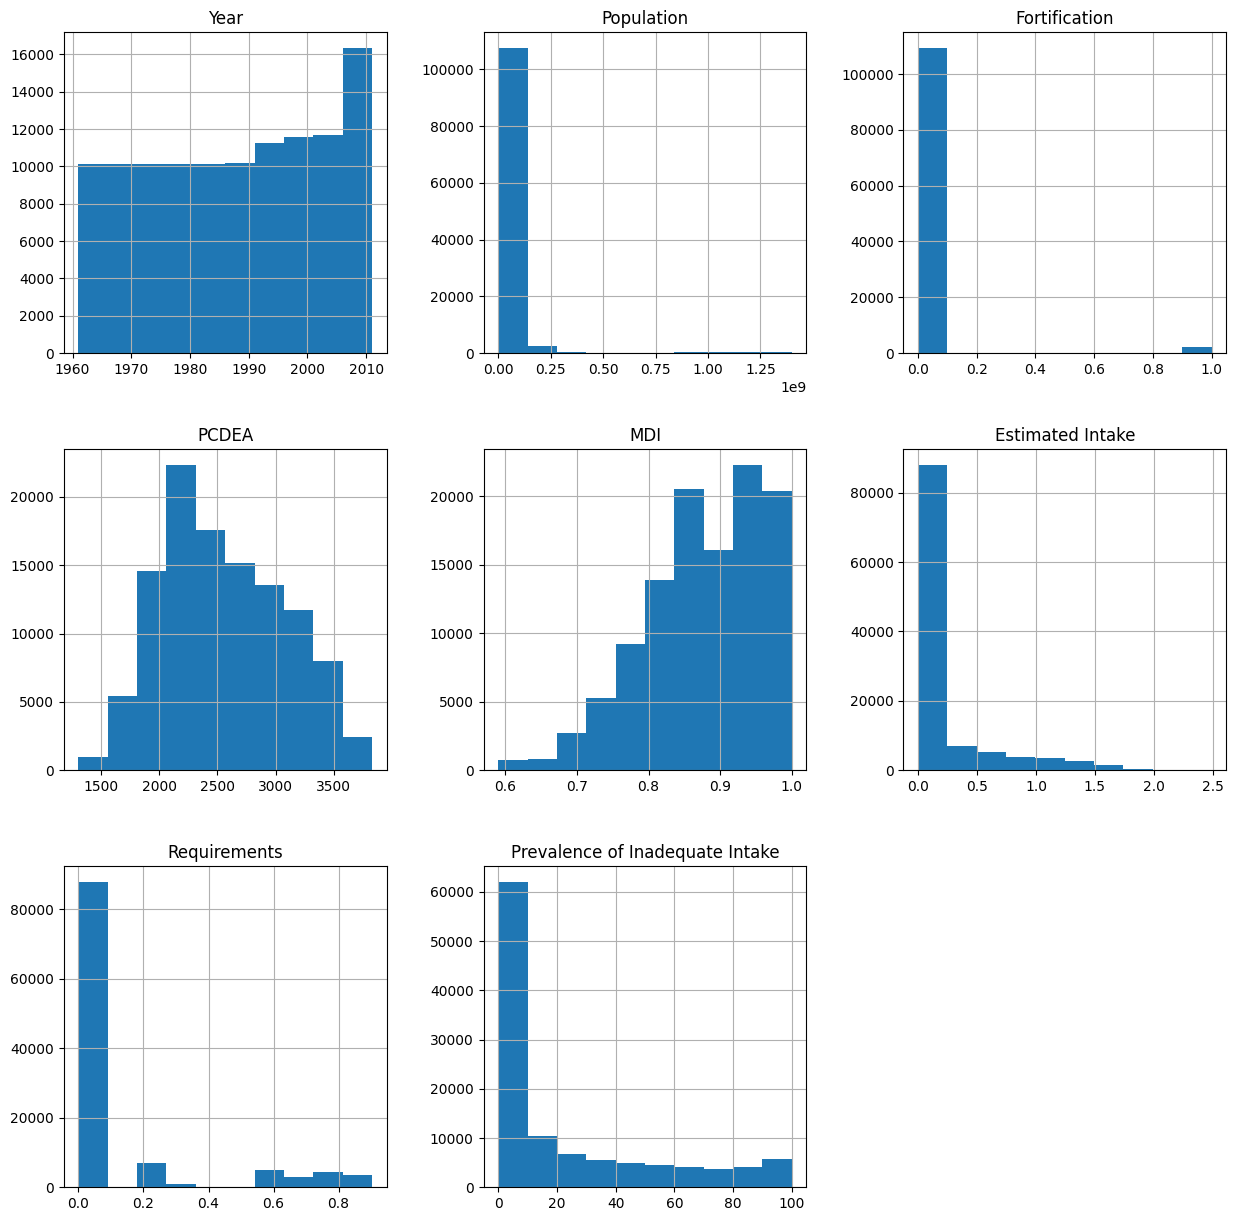

In [67]:
# plt.figure()
df.hist(figsize = (15,15))
# plt.show()
#y axis is the number of items

The histogram shows extremely skewed data graphs. PCDEA is the closest to a normal distribution. MDI and Population is negatively skewed. The rest of the graphs are all positively skewed. To deal with the skew, based on the natural data, leaving most features untransformed is a viable option.

Insert Preprocessing (needs to be scaled, data should bell curve)

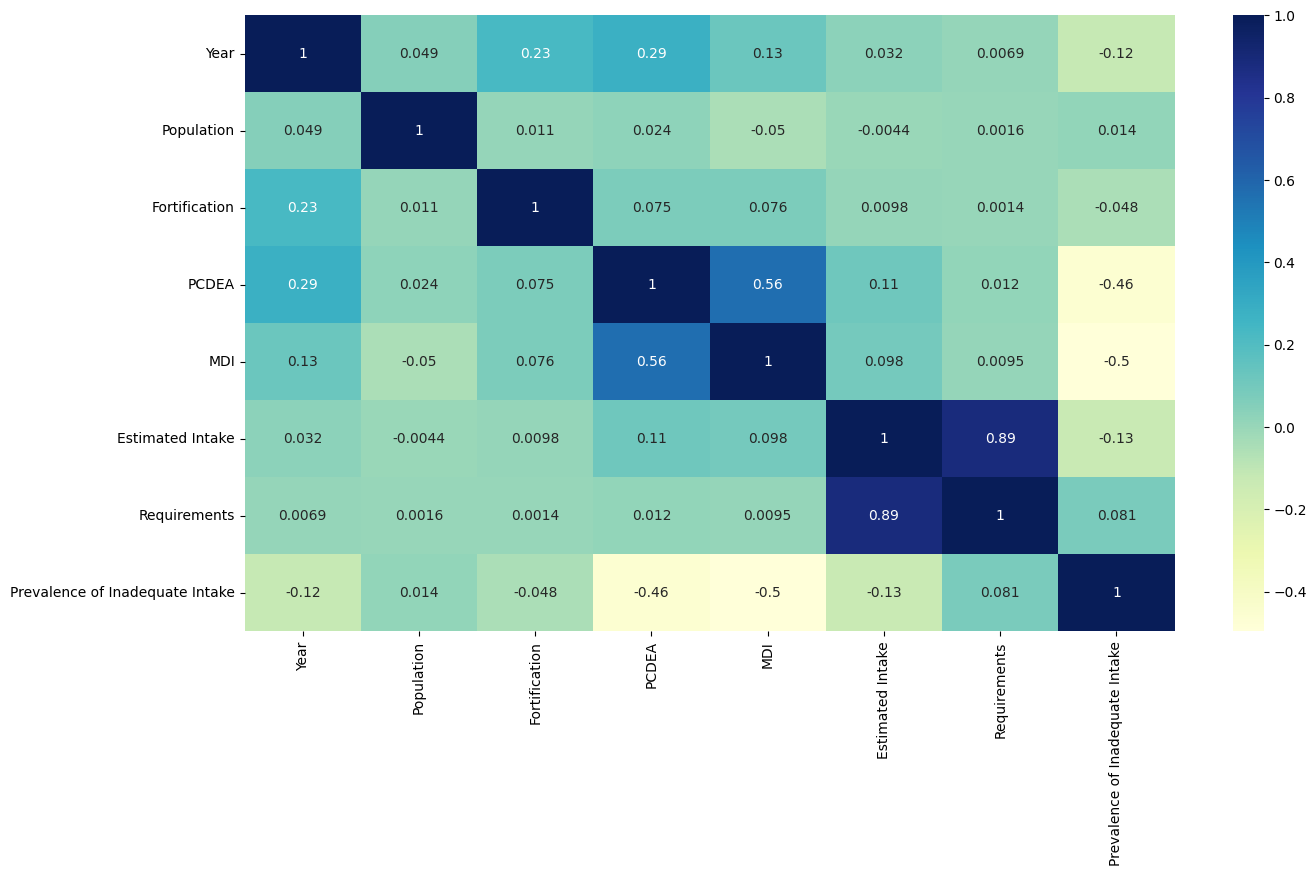

In [68]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap= 'YlGnBu') # numeric_only = True excludes the categorical variable because I can make a heatmap with only numerical variables
plt.show()

Heatmap using the .corr function on the dataframe shows the diagonal which correctly shows each feature correlates with itself.

The Heatmap on the raw data additionally shows strong positive correlation between Requirements and Estimated intake - a score of 0.89. This states that as a population's requirements for micronutrients increase, the estimated intake of a population also increase. This is interpreted as a government being able to meet the growing micronutrient on average.

The Heat map also shows a positive correlation between PCDEA and MDI - a score of 0.56. This states as National per capita daily energy availability increases, the micronutrient density index increases each year. This is inperpreted as a government being better able to facilitate its growing population's micronutrient needs on average, thus increasing MDI.

The Heatmap shows a negative correlation between Prevelance of inadequete intake and the features: PCDEA and MDI - a score of -0.46 and -0.5 respectively. This is interpreted as the increase in Prevalence of inadequete intake correlates to decreased decreasing national capita daily energy capacity and decreasing Micronutrient density index.

### Scaled

Logarithmic Transformations

In [69]:
#df['Prevalence of Inadequate Intake'] = np.log(df['Prevalence of Inadequate Intake'])
df['Requirements'] = np.log(df['Requirements'])
#df['Estimated Intake'] = np.log(df['Estimated Intake'])

#df['MDI'] = np.log(df['MDI'])
#df['Fortification'] = np.log(df['Fortification']) #uncommented causes all other histograms to go blank??
df['Population'] = np.log(df['Population'])

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Fortification'}>],
       [<Axes: title={'center': 'PCDEA'}>,
        <Axes: title={'center': 'MDI'}>,
        <Axes: title={'center': 'Estimated Intake'}>],
       [<Axes: title={'center': 'Requirements'}>,
        <Axes: title={'center': 'Prevalence of Inadequate Intake'}>,
        <Axes: >]], dtype=object)

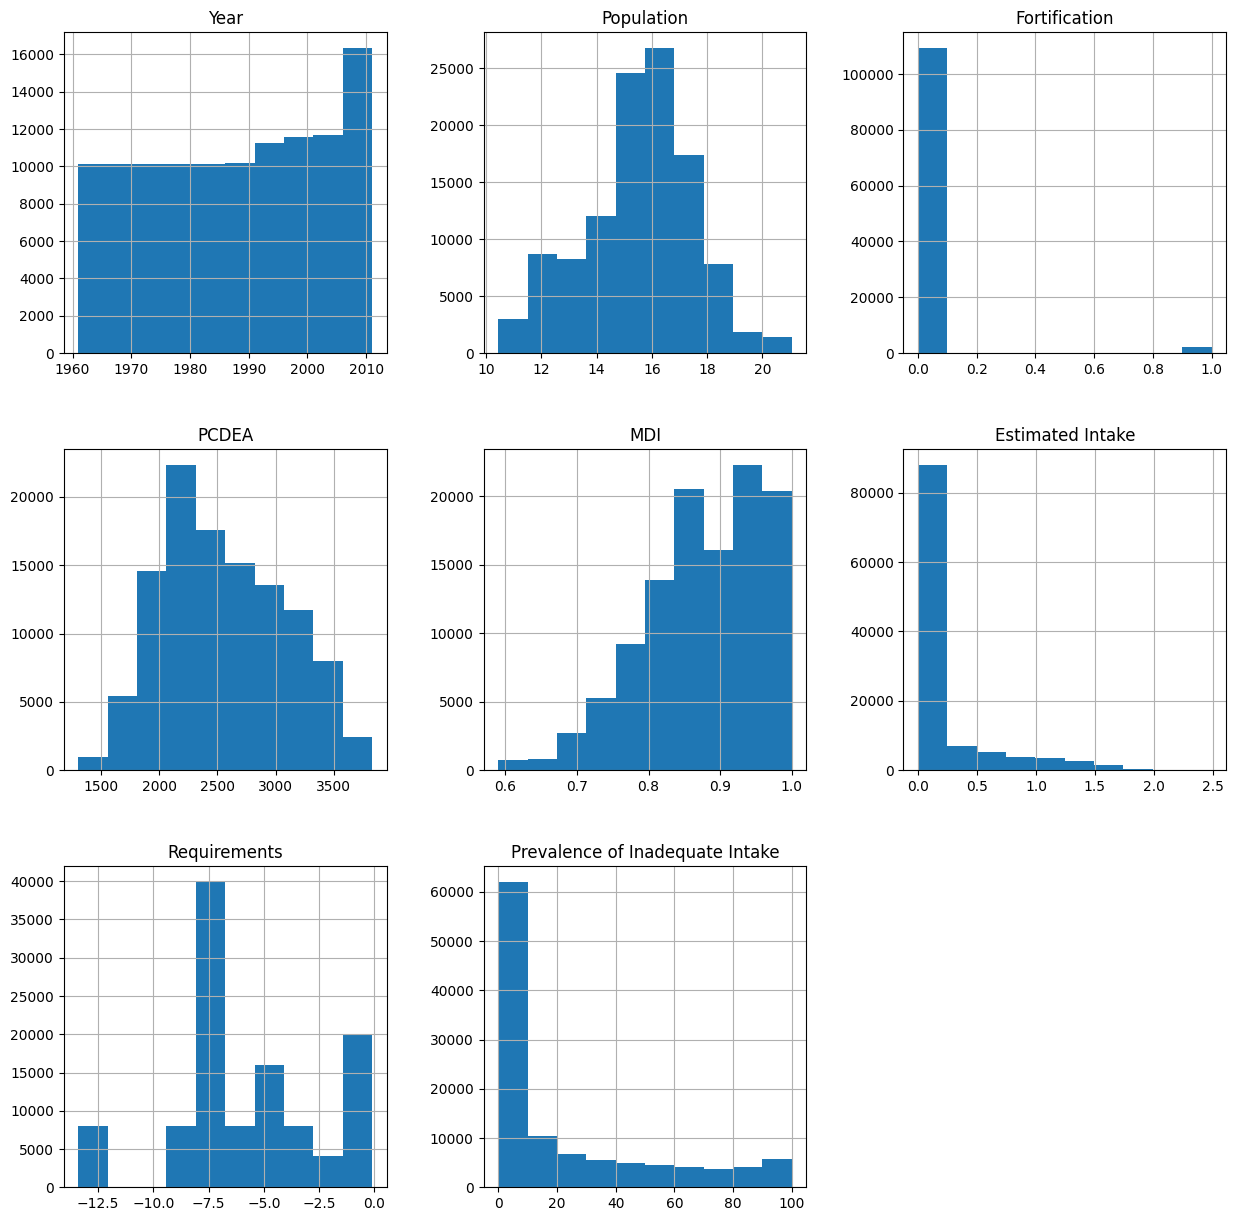

In [70]:
df.hist(figsize = (15,15))

Using logarithmic transformation has improved distribution of population and requirements, with the mean being more centrallly skewed.

### Categorical features analysis

In [71]:
df['Zone'].value_counts()

Zone
Subsaharan Africa        29120
Latin America            22568
Remaining High Income    20748
WCANA                    15050
Southeast Asia            9464
Other                     6860
South Asia                4368
East Asia                 3640
Name: count, dtype: int64

<Axes: ylabel='count'>

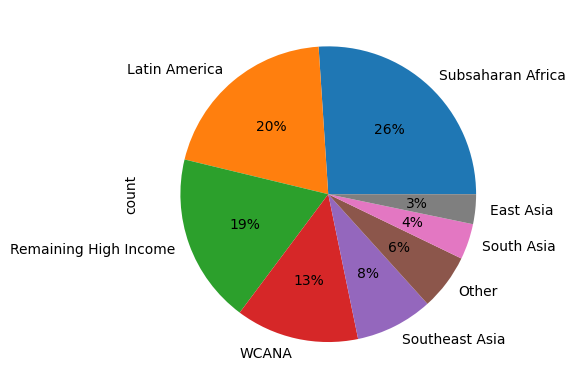

In [72]:
df['Zone'].value_counts().plot(kind='pie', autopct='%1.0f%%')

WCANA stands for West Central Asia and North Africa

“High Income NES” is the only reference to Remaining High Income, stands for High Income countries not elsewhere specified (Australia, Canada, New Zealand, United States, and Western Europe)

Zone is the feature being predicted by the algorithm. The categories are extremely unbalanced with categories ranging from 29,120 items to 3,640 items.

### Encoding

In [73]:
le = LabelEncoder()

In [74]:
df['Zone'] = le.fit_transform(df['Zone'])

In [75]:
df['Zone'].value_counts()

Zone
6    29120
1    22568
3    20748
7    15050
5     9464
2     6860
4     4368
0     3640
Name: count, dtype: int64

In [76]:
df['Country'] = le.fit_transform(df['Country'])

In [77]:
df['Country'].value_counts()

Country
0      728
110    728
102    728
96     728
97     728
      ... 
154    294
134    280
37     280
14     182
88     182
Name: count, Length: 170, dtype: int64

In [78]:
df['Units'] = le.fit_transform(df['Units'])

In [79]:
df['Tagname'] = le.fit_transform(df['Tagname'])

In [80]:
df['Micronutrient'] = le.fit_transform(df['Micronutrient'])

In [81]:
df['Micronutrient'].value_counts()

Micronutrient
12    7987
13    7987
9     7987
0     7987
1     7987
7     7987
6     7987
11    7987
10    7987
3     7987
2     7987
8     7987
5     7987
4     7987
Name: count, dtype: int64

Using label encoder, each feature data label is enumerated.

In [82]:
df.head(2)

Zone  Country ISO3  Year  Population  Fortification  PCDEA       MDI  \
0     7        0  AFG  1961   16.007611              0   2997  0.773239   
1     7        0  AFG  1961   16.007611              0   2997  0.773239   

   Tagname  Micronutrient  Units  Estimated Intake  Requirements  \
0       12             12      1          0.040922     -2.996626   
1       13             13      1          0.001677     -6.336924   

   Prevalence of Inadequate Intake  
0                        62.746266  
1                        58.326559

array([[<Axes: title={'center': 'Zone'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Fortification'}>,
        <Axes: title={'center': 'PCDEA'}>,
        <Axes: title={'center': 'MDI'}>,
        <Axes: title={'center': 'Tagname'}>],
       [<Axes: title={'center': 'Micronutrient'}>,
        <Axes: title={'center': 'Units'}>,
        <Axes: title={'center': 'Estimated Intake'}>,
        <Axes: title={'center': 'Requirements'}>],
       [<Axes: title={'center': 'Prevalence of Inadequate Intake'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

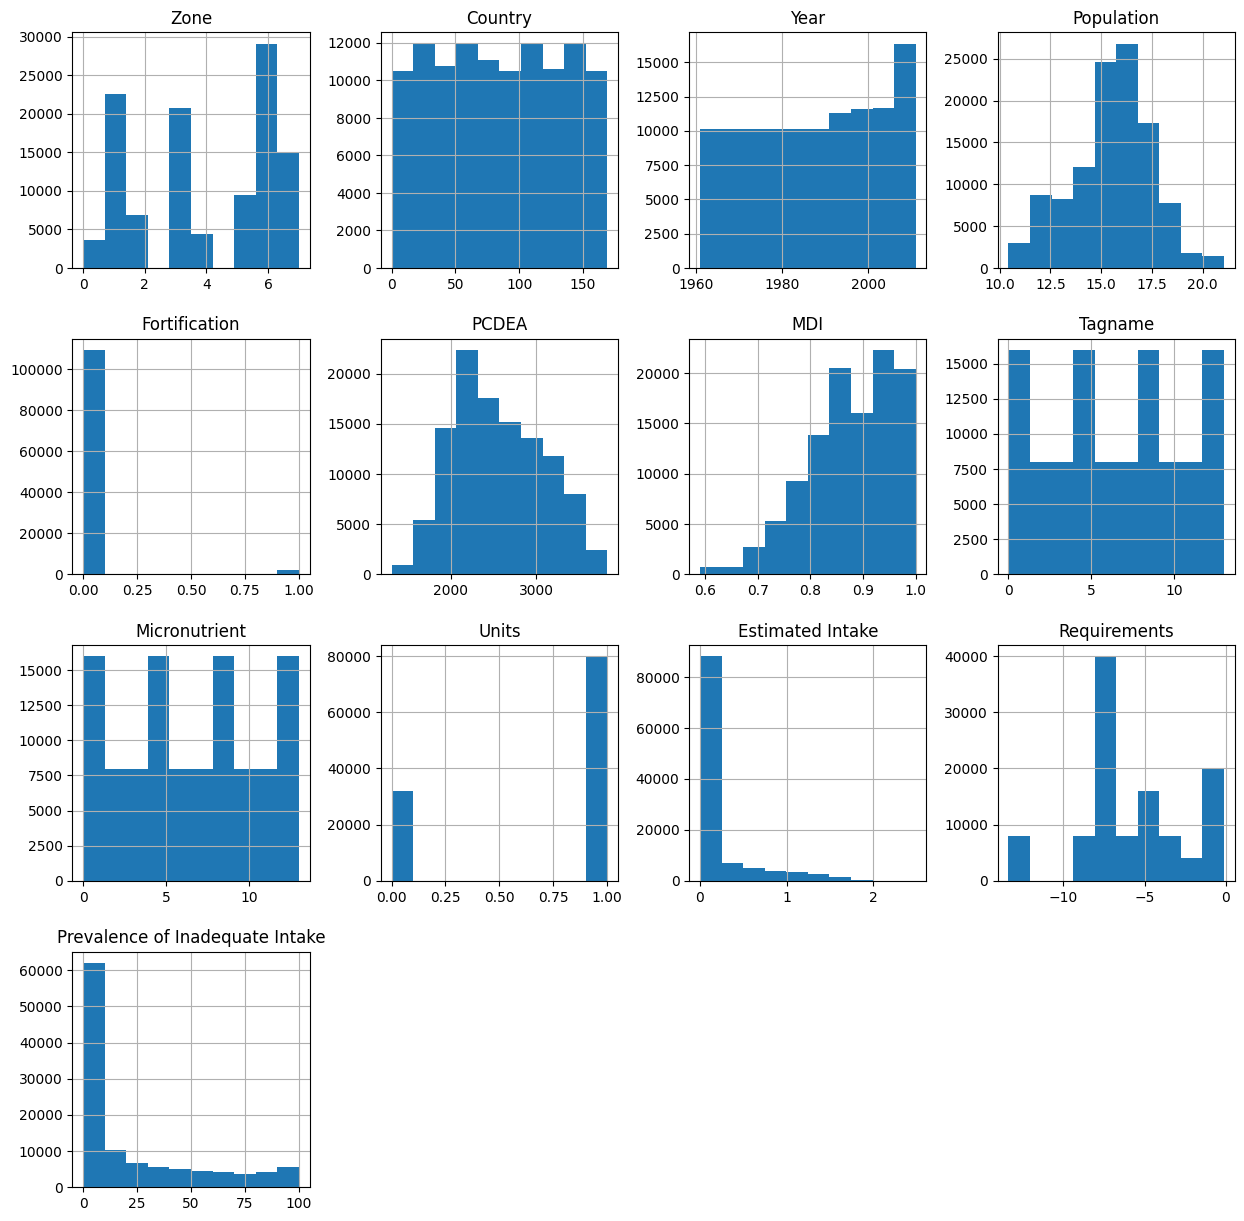

In [83]:
#plt.figure(figsize = (15, 8)) # why (15,8)??
#sns.heatmap(df.corr(), annot= True, cmap= 'YlGnBu')
#plt.show()

df.hist(figsize = (15,15))

After encoding, graphs such as Units and Tagname appear but their skews are not relevant to predicting zone and can be ignored.

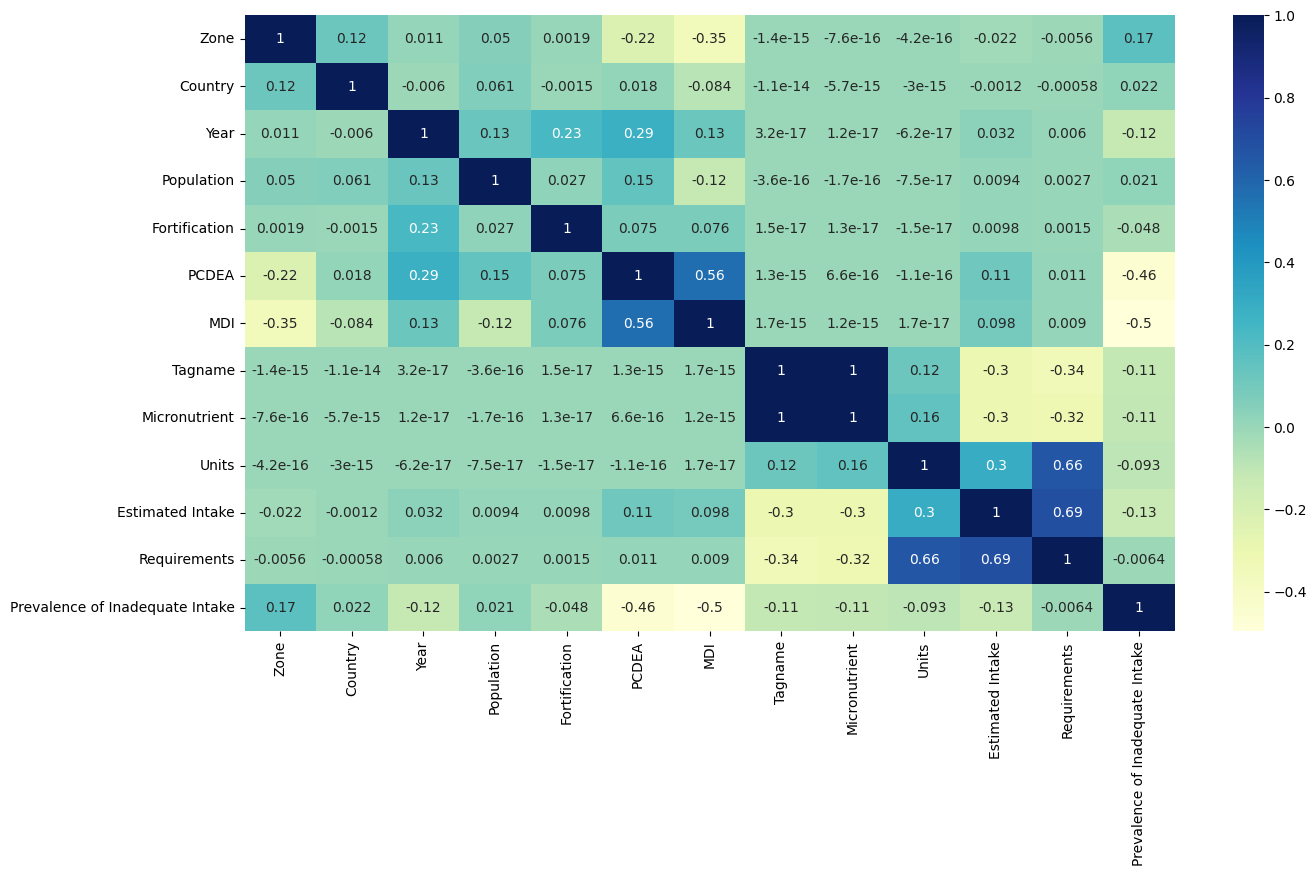

In [84]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap= 'YlGnBu') # numeric_only = True excludes the categorical variable because I can make a heatmap with only numerical variables
plt.show()

In histogtam 1, less features and purely statistical data was shown. This second histogram shows both statistical and enumerated label data, showing more uncorelated data (values close to 0) as labels only have correlation to specific features they are related to.

More visualisations

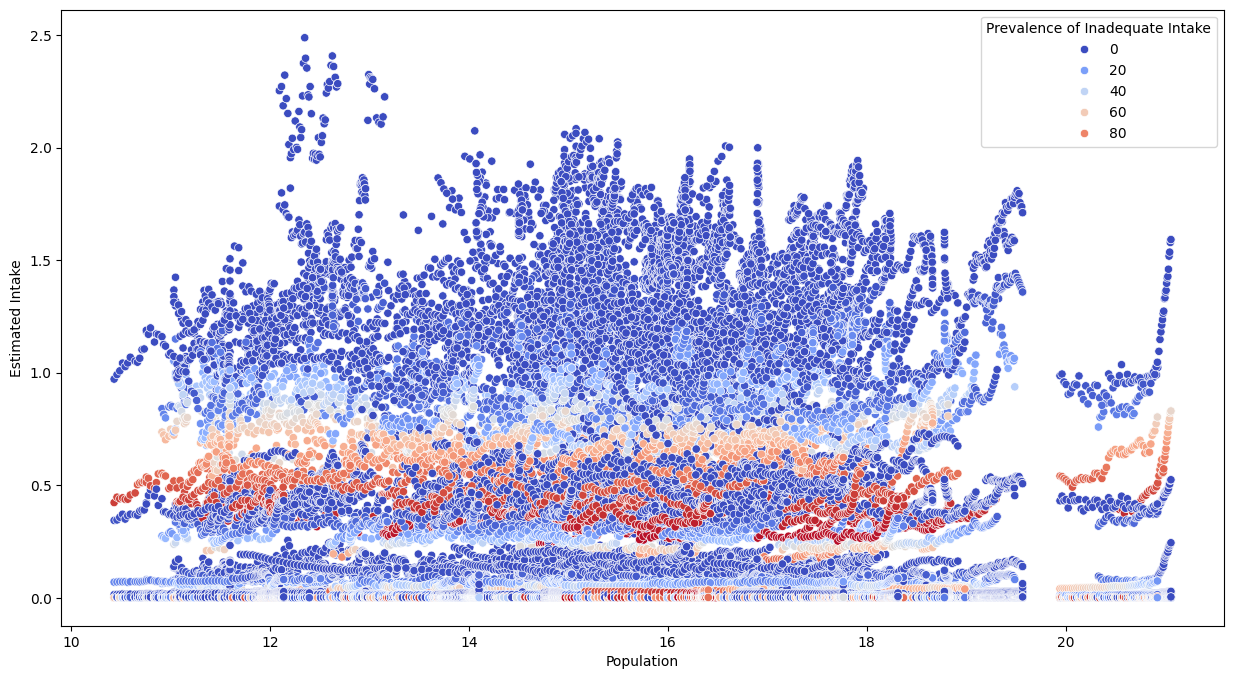

In [85]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data= df,
                x = 'Population',
                y ='Estimated Intake',
                hue= 'Prevalence of Inadequate Intake',
                palette ='coolwarm')
plt.show()

The scatterplot shows that the prevelance of inadeqate intake disregards population factors and is more heavily concentrated where estimated intakeis at 0.5.

In [86]:
#df['Intake_ratio'] = df['Estimated Intake'] / df['Prevalence of Inadequate Intake']
df['Inadequate Intake Population'] = df['Prevalence of Inadequate Intake'] * df['Population']

In [87]:
df.head(2)

Zone  Country ISO3  Year  Population  Fortification  PCDEA       MDI  \
0     7        0  AFG  1961   16.007611              0   2997  0.773239   
1     7        0  AFG  1961   16.007611              0   2997  0.773239   

   Tagname  Micronutrient  Units  Estimated Intake  Requirements  \
0       12             12      1          0.040922     -2.996626   
1       13             13      1          0.001677     -6.336924   

   Prevalence of Inadequate Intake  Inadequate Intake Population  
0                        62.746266                   1004.417816  
1                        58.326559                    933.668865

In [88]:
#df.hist(figsize = (15,15))

In [89]:
plt.figure(figsize = (15, 8))
#sns.heatmap(df.corr(), annot= True, cmap= 'YlGnBu') #not working
plt.show()

<Figure size 1500x800 with 0 Axes>

In [91]:
df.dtypes

Zone                                 int64
Country                              int64
ISO3                                object
Year                                 int64
Population                         float64
Fortification                        int64
PCDEA                                int64
MDI                                float64
Tagname                              int64
Micronutrient                        int64
Units                                int64
Estimated Intake                   float64
Requirements                       float64
Prevalence of Inadequate Intake    float64
Inadequate Intake Population       float64
dtype: object

# Baseline Prediction Algorithm Classification

Predicting a feature now below!!

1.   MultiNomial Bayes
2.   Random Forests
3.   Decision Tree Clasification
4.   Deep Learning
5.   SVC
6.   Logistic Regression


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [93]:


X = df.drop(columns = ['Zone','Country', 'ISO3'], axis= 1)
#X = df.drop(columns = ['Zone','Country', 'ISO3', 'Inadequate Intake Population', 'Population', 'PCDEA'], axis= 1)


y = df['Zone'] # our target value

X dropping columns which give the algorithm the predicted feature, removes country and ISO3 which causes the model to be too accurate in prediction.

y is the column which holds all data regarding the target predicted feature.

In [94]:
X.head()

Year  Population  Fortification  PCDEA       MDI  Tagname  Micronutrient  \
0  1961   16.007611              0   2997  0.773239       12             12   
1  1961   16.007611              0   2997  0.773239       13             13   
2  1961   16.007611              0   2997  0.773239        9              9   
3  1961   16.007611              0   2997  0.773239        0              0   
4  1961   16.007611              0   2997  0.773239        1              1   

   Units  Estimated Intake  Requirements  Prevalence of Inadequate Intake  \
0      1          0.040922     -2.996626                        62.746266   
1      1          0.001677     -6.336924                        58.326559   
2      0          0.000275     -7.677056                        84.225561   
3      1          0.700043     -0.244506                        63.814563   
4      0          0.001979     -7.472281                         0.090734   

   Inadequate Intake Population  
0                   1004.417816  
1                    933.668865  
2                   1348.250017  
3                   1021.518689  
4                      1.452427

In [95]:
X.dtypes

Year                                 int64
Population                         float64
Fortification                        int64
PCDEA                                int64
MDI                                float64
Tagname                              int64
Micronutrient                        int64
Units                                int64
Estimated Intake                   float64
Requirements                       float64
Prevalence of Inadequate Intake    float64
Inadequate Intake Population       float64
dtype: object

In [96]:
y

0         7
1         7
2         7
3         7
4         7
         ..
111813    6
111814    6
111815    6
111816    6
111817    6
Name: Zone, Length: 111818, dtype: int64

In [97]:
X.isnull().sum()

Year                               0
Population                         0
Fortification                      0
PCDEA                              0
MDI                                0
Tagname                            0
Micronutrient                      0
Units                              0
Estimated Intake                   0
Requirements                       0
Prevalence of Inadequate Intake    0
Inadequate Intake Population       0
dtype: int64

In [98]:
# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [99]:
X_train.shape

(67090, 12)

In [100]:
X_test.shape

(44728, 12)

In [101]:
y_train.shape

(67090,)

In [102]:
y_test.shape

(44728,)

## Logistic Regression

Logistic regression estimates the probability of an event occuring. The type of statistical model is often used for  classification and predictive analysis. The model uses the logistic model to give function outputs between 0 and 1 for all values of X.

In [103]:
%%time
logreg = LogisticRegression(C=1e9,  max_iter=1000) #use %%time for computational stats
logreg.fit(X, y)

CPU times: user 45.9 s, sys: 31.7 s, total: 1min 17s
Wall time: 48.1 s


LogisticRegression(C=1000000000.0, max_iter=1000)

In [104]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, max_iter=1000)

Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.62      0.00      0.01      1407
           1       0.37      0.37      0.37      9084
           2       0.49      0.07      0.12      2671
           3       0.64      0.88      0.74      8225
           4       0.44      0.25      0.32      1804
           5       0.36      0.04      0.06      3855
           6       0.49      0.77      0.60     11628
           7       0.21      0.14      0.17      6054

    accuracy                           0.47     44728
   macro avg       0.45      0.32      0.30     44728
weighted avg       0.45      0.47      0.42     44728



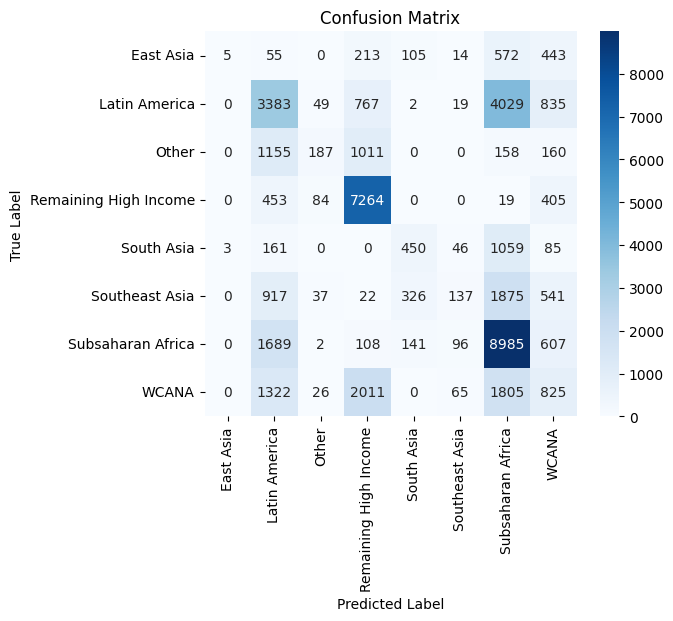

In [105]:
y_true = y_test
y_pred = logreg.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels

# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Observations

Logistic regression is effective in predicting Remaining High Income and subsaharan africa. Logistic Regression struggles most even whilst recieving all information from dataset.

### Logistic Regression Cross Validated

Follows the same method as Logistic regression, but model has built-in cross-validation capabilities to automatically select the best hyper-parameters and can take advantage of warm-starting by reusing precomputed resilts in previous steps of cross-validation process.

In [106]:
%%time
from sklearn.linear_model import LogisticRegressionCV
logregCV = LogisticRegressionCV( max_iter=1000) #use %%time for computational stats
logregCV.fit(X, y)

CPU times: user 31min 26s, sys: 21min, total: 52min 26s
Wall time: 31min 6s


LogisticRegressionCV(max_iter=1000)

In [107]:
logregCV.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_true = y_test
y_pred = logregCV.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels

# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Observations

Across the confusion matrix, the F1-score for predicting each label is similar to the logistic regression without cross validation. For its significantly longer processing time with cross validation, the results do not satisfy its viability to predict classification any better than Logistic Regression without CV.

Due to logistic regression being used in binary classification, one hot encoding each zone as was done for the application of deep learning and outputting individual decision matricies is an improvement of application I would use.

## SVC

A Support vector classifier is a model for classification tasks, given a set of training examples, each labeled as belonging to one of two classes, the goal is to find a decision boundary that maximally separates the two classes (usually done by a line inbetween two plots). It is done with supervision as overfitting and underfitting a model can be key issues.

In [109]:
%%time
svc = LinearSVC()
#svc.fit(X, y)

CPU times: user 12 µs, sys: 8 µs, total: 20 µs
Wall time: 25 µs


In [110]:
svc.fit(X_train, y_train)

LinearSVC()

Accuracy: 0.47
              precision    recall  f1-score   support

           0       1.00      0.01      0.03      1407
           1       0.38      0.27      0.32      9084
           2       0.00      0.00      0.00      2671
           3       0.57      0.94      0.71      8225
           4       0.45      0.10      0.17      1804
           5       0.59      0.01      0.02      3855
           6       0.44      0.89      0.59     11628
           7       0.23      0.02      0.04      6054

    accuracy                           0.47     44728
   macro avg       0.46      0.28      0.23     44728
weighted avg       0.43      0.47      0.36     44728



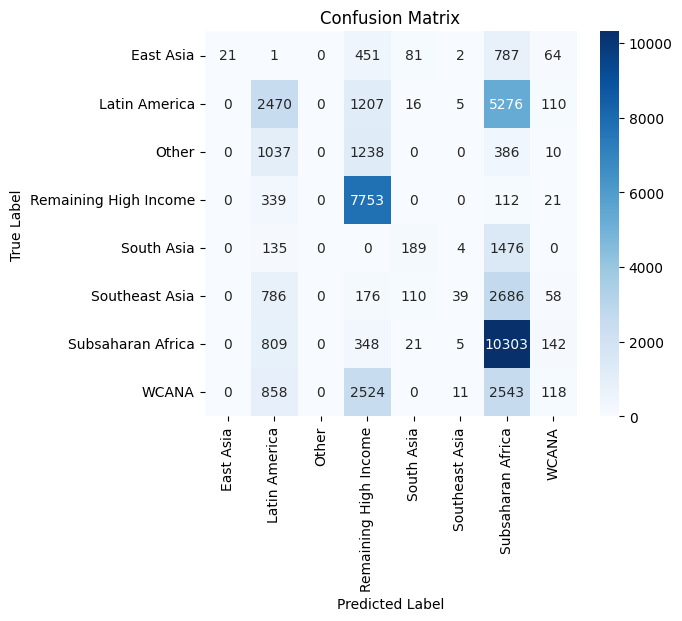

In [111]:
y_true = y_test
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels
# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Observations

Performed poorly with F1-scores seen highest for Remaining High Income, Subsaharan Africa. Points of interest where model labels incorrectly are WCANA being predicted as Remaining High Income as well as Subsaharan Africa being labeled where true si Latin America. This could show similarities in diets or show a greater trend in fortification or other factors being practiced.

## Random Forests

Random Forests Classifier Algorithm merges the outputs of multiple decision trees to produce a single outcome. Random Forests uses ensemble modelling, where a classification goes through majority voting.

In essence:
1. subset of data points and featuresnare selected for constructing each decision tree
2. Individual decision trees are constructed for each sample
3. Each decision tree will generate output
4. Final output is considered based on majority voting

Accuracy: 0.98

Classification Report:
                        precision    recall  f1-score   support

            East Asia       1.00      0.97      0.99      1407
        Latin America       0.98      0.98      0.98      9084
                Other       1.00      0.98      0.99      2671
Remaining High Income       1.00      1.00      1.00      8225
           South Asia       1.00      0.99      0.99      1804
       Southeast Asia       0.99      0.98      0.99      3855
    Subsaharan Africa       0.96      1.00      0.98     11628
                WCANA       0.99      0.96      0.97      6054

             accuracy                           0.98     44728
            macro avg       0.99      0.98      0.99     44728
         weighted avg       0.98      0.98      0.98     44728



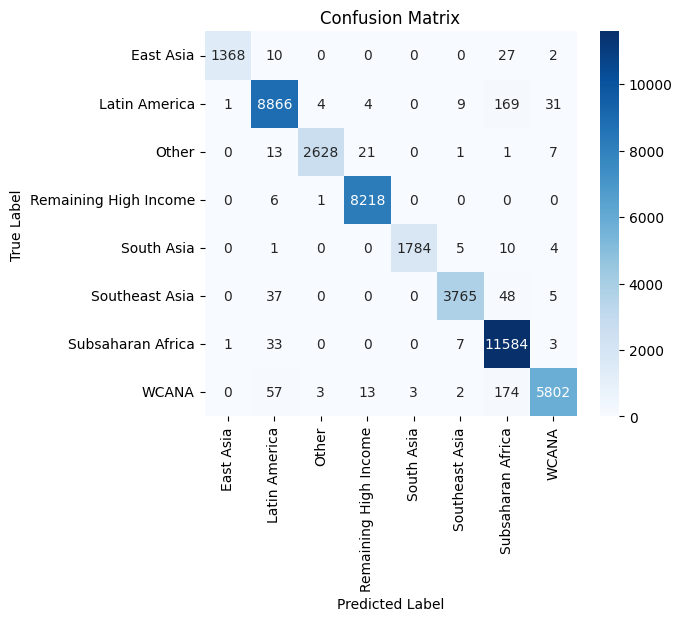

CPU times: user 25.4 s, sys: 243 ms, total: 25.6 s
Wall time: 25.6 s


In [112]:
%%time
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators is number of trees

# # Train the classifier
rf_classifier.fit(X_train, y_train) #fitting algorithm on training data

# # Make predictions on the test set
y_pred = rf_classifier.predict(X_test) #keep y away from prediction

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])

# # Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Step 3: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels
# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Obervations

Time taken to predict was extremely short compared to logistic regression but was far more accurate. This is shown in F1-score being above 0.97 in prediction for all cases. This suggests the model was overfitting and is suceptible to worse performance on completely blind original data. When more columns are dropped, the performance drops to 80-90% F1-scores throughout the categories, far more accurate than logistic and later seen naive bayes.

## K-Nearest Neighbour

K-nearest neighbours algorithm uses proximity to make classifications or predictions about the grouping of individual data points. It works off the assumption similar points can be found near one another. It is another algorithm utilising majority voting concept (requires > 50%).

[IBM KNN Explanation](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20non,used%20in%20machine%20learning%20today.)

In [113]:
%%time
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

CPU times: user 161 ms, sys: 13.5 ms, total: 175 ms
Wall time: 179 ms


KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1407
           1       0.98      0.98      0.98      9084
           2       1.00      0.98      0.99      2671
           3       1.00      1.00      1.00      8225
           4       1.00      0.99      0.99      1804
           5       0.99      0.98      0.99      3855
           6       0.96      1.00      0.98     11628
           7       0.99      0.96      0.97      6054

    accuracy                           0.98     44728
   macro avg       0.99      0.98      0.99     44728
weighted avg       0.98      0.98      0.98     44728



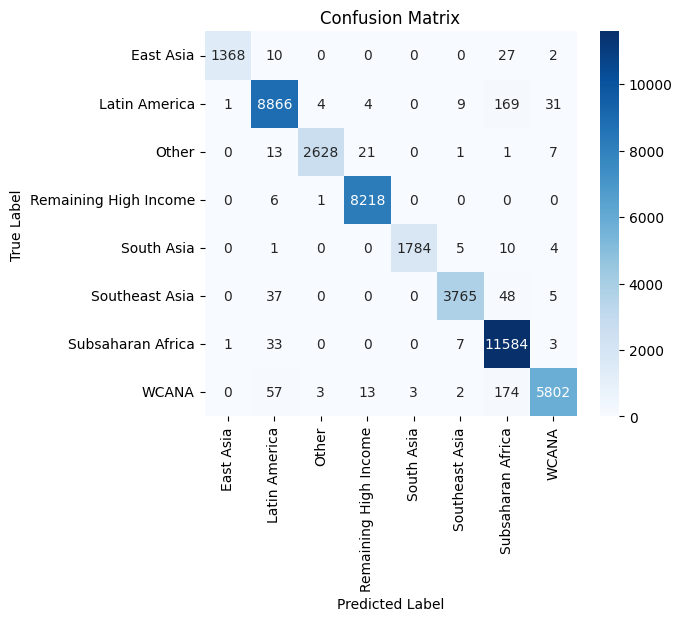

In [114]:
y_pred_knn = knn.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

# Step 3: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels
# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Observation

The accuracy and distribution of correct classifications is extremely similar and suggests once again overfitting on model data due to the model being given too much information. A cross validation section could be useful in this case to check for overfitting.

## MultiNominal Naive Bayes

Multinomial Naive Bayes uses Bayes theorem to predict occurance of an event. The model selects the class with the highest probability as the predicted class for the data point.

In essence:
1. Calculate prior probabilities of each class based on training data
2. Calculate Likelihoods of observing each feature given for each class, representing how likely each feature is to occur given specifications
3. Apply bayes theorem
4. Make predictions by assigning the instance to the class with highest posterior probability P(Y|X)

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

#model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [116]:
X_bayes = df.drop(columns = ['Zone','Country', 'ISO3', 'Inadequate Intake Population', 'Requirements', 'Population', 'PCDEA'], axis= 1)

In [117]:
%%time
# Create and train a multinomial naive bayes classifier (MultinomialNB)
bayes = MultinomialNB()
bayes.fit(X_bayes, y)

CPU times: user 28.3 ms, sys: 18.6 ms, total: 46.9 ms
Wall time: 51 ms


MultinomialNB()

In [118]:
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y, test_size=0.4, random_state=42)

In [119]:
bayes.fit(X_train_bayes, y_train_bayes)

MultinomialNB()

Accuracy: 0.24
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1407
           1       0.29      0.10      0.15      9084
           2       0.09      0.06      0.07      2671
           3       0.29      0.84      0.43      8225
           4       0.08      0.39      0.14      1804
           5       0.00      0.00      0.00      3855
           6       0.32      0.14      0.20     11628
           7       0.15      0.04      0.07      6054

    accuracy                           0.24     44728
   macro avg       0.15      0.20      0.13     44728
weighted avg       0.22      0.24      0.18     44728



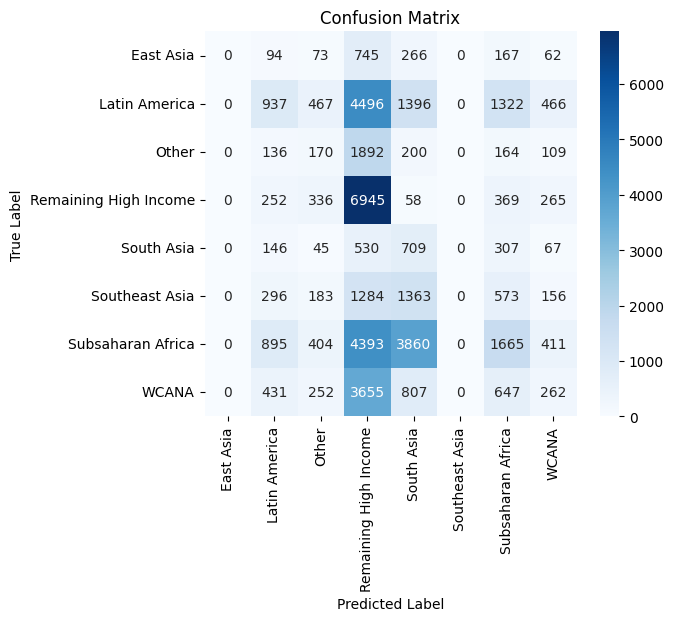

In [120]:
y_true = y_test_bayes
y_pred = bayes.predict(X_test_bayes)
matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

# Step 3: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels
# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Observation

It is clear the lack of holding out (process repeated several times with different sub samples) and cross validation (post fine-tuning to check accuracy) negatively impacts Naive bayes as well as the lack of scaling.

## Decision Tree Classifier

Decision Tree is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules, and each leaf node represents the outcome.
In essence:
1.	Split data
2.	Recursively iterate through tree
3.	Decision making with Entropy
Entropy in a decision tree measures the impurity of a node – i.e. the uncertainty.

[Decision Tree Classifier Explanation](https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm)

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
%%time
dt_classifier = DecisionTreeClassifier()
#dt_classifier.fit(X, y)

CPU times: user 19 µs, sys: 12 µs, total: 31 µs
Wall time: 34.8 µs


In [123]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1407
           1       1.00      0.99      1.00      9084
           2       1.00      1.00      1.00      2671
           3       1.00      1.00      1.00      8225
           4       1.00      1.00      1.00      1804
           5       1.00      1.00      1.00      3855
           6       0.99      0.99      0.99     11628
           7       0.99      0.99      0.99      6054

    accuracy                           1.00     44728
   macro avg       1.00      1.00      1.00     44728
weighted avg       1.00      1.00      1.00     44728



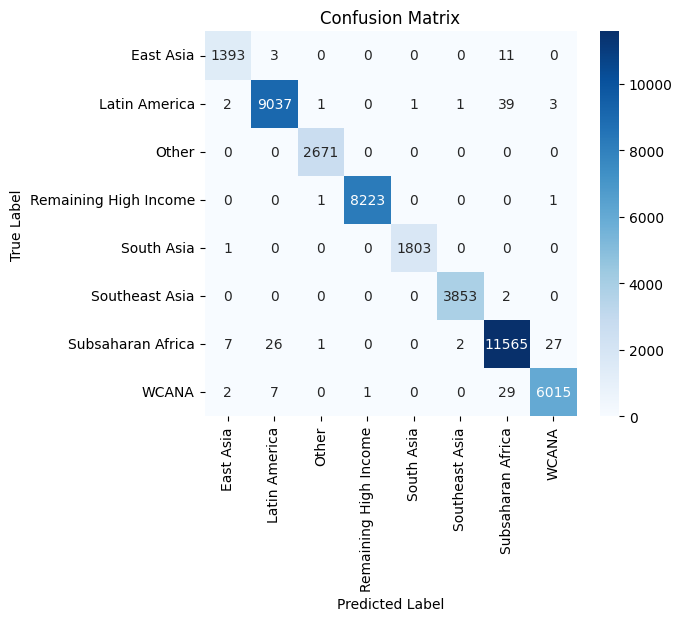

In [124]:
y_pred = dt_classifier.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

# Step 3: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels
# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Observation

Highly accurate, likely overfitting on training data or there is too much data leakage in train-test split. More accurate than KNN and Random Forests despite random forests being a collection of decision trees.

# HyperParameter Tuning

According to [Hyperparameter explanation article](https://cloud.google.com/bigquery/docs/hp-tuning-overview#:~:text=In%20machine%20learning%2C%20hyperparameter%20tuning,a%20linear%20model%20are%20learned.) in machine learning, hyperparameter tuning identifies a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins.

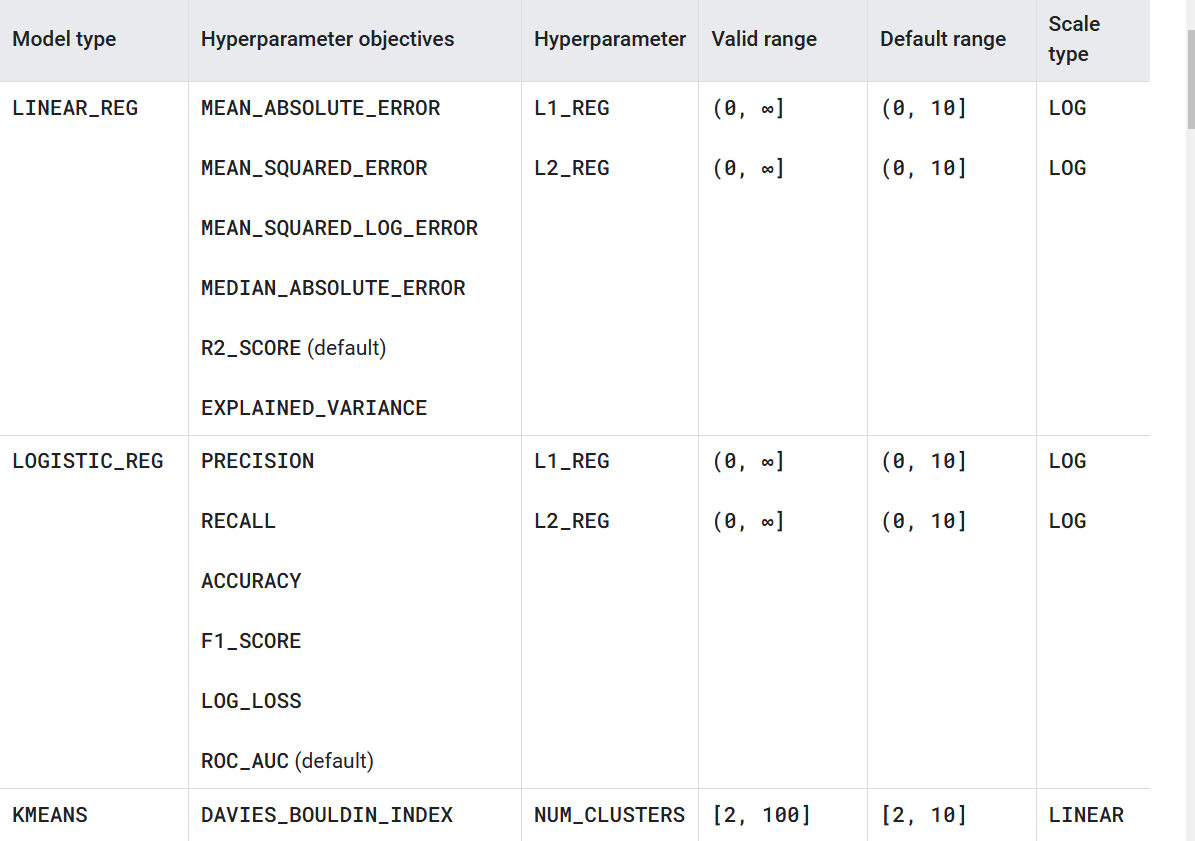


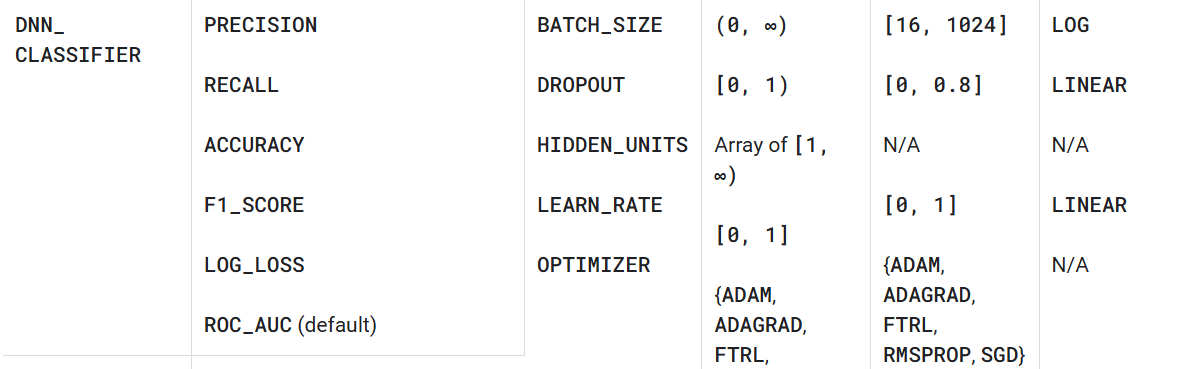

In [125]:
#SVC (use girdsearch and talk about in improvements - remove outliers)

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [127]:
sc = MinMaxScaler() #scaling, compare between standard and other scalings

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [128]:
logreg.fit(X_train_scaled, y_train)
logreg.score(X_train_scaled, y_train)
logreg.score(X_test_scaled, y_test)

0.5433062064031479

In [129]:
rf_classifier.fit(X_train_scaled, y_train)
rf_classifier.score(X_train_scaled, y_train)
rf_classifier.score(X_test_scaled, y_test)

0.9861384367733858

In [130]:
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.871042747272402

In [131]:
bayes.fit(X_train_scaled, y_train)
bayes.score(X_train_scaled, y_train)
bayes.score(X_test_scaled, y_test)

0.38009747808978717

In [132]:
svc.fit(X_train_scaled, y_train)
svc.score(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.5297800035771776

In [150]:
dt_classifier.fit(X_train_scaled, y_train)
dt_classifier.score(X_train_scaled, y_train)
dt_classifier.score(X_test_scaled, y_test)

0.996042747272402

### Hyperparameter Train Test Random Forest Classifier

In [133]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [134]:
imp_features = pd.DataFrame({
    'columns':X_train.columns,
    'importance': rf.feature_importances_
    })

In [135]:
imp_features.sort_values(by='importance', ascending= False)

columns  importance
1                        Population    0.226584
4                               MDI    0.223780
3                             PCDEA    0.214924
0                              Year    0.087209
9                      Requirements    0.065227
10  Prevalence of Inadequate Intake    0.052343
11     Inadequate Intake Population    0.049994
8                  Estimated Intake    0.048271
6                     Micronutrient    0.014060
5                           Tagname    0.013329
7                             Units    0.002298
2                     Fortification    0.001980

Population, MDI and PCDEA are illustrated as the most important X_train factors to predict y. This matches the experimentation with dropping these features from the X causes a significant drop in accuracy to the KNN, Random Forests and Decision Tree algorithms, reducing data leakage).

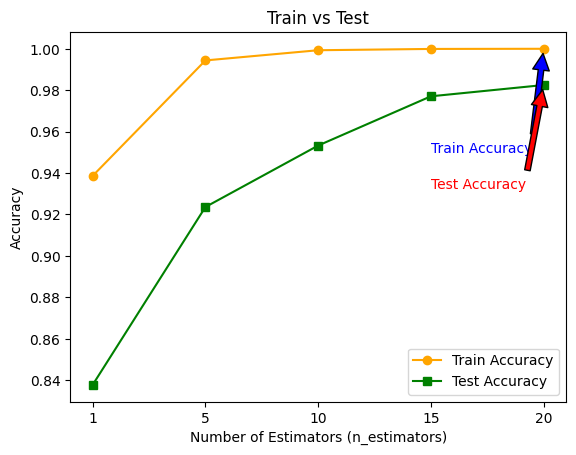

In [136]:
est = [1, 5, 10, 15, 20]  # Estimators list
accuracy_list_train = []
accuracy_list_test = []

for i in est:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train_scaled, y_train)
    accuracy_list_train.append(rf.score(X_train_scaled, y_train))
    accuracy_list_test.append(rf.score(X_test_scaled, y_test))

# Plotting the accuracy vs. number of estimators
plt.title("Train vs Test")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.xticks(ticks=range(len(est)), labels=est)

# Plot the train and test accuracy
plt.plot(accuracy_list_train, label="Train Accuracy", marker='o', color='orange')
plt.plot(accuracy_list_test, label="Test Accuracy", marker='s', color='green')

# Annotating the lines
plt.annotate('Train Accuracy', xy=(len(est)-1, accuracy_list_train[-1]), xytext=(len(est)-2, accuracy_list_train[-1] - 0.05),
             arrowprops=dict(facecolor='blue', shrink=0.05), color='blue')
plt.annotate('Test Accuracy', xy=(len(est)-1, accuracy_list_test[-1]), xytext=(len(est)-2, accuracy_list_test[-1] - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red')

# Add a legend
plt.legend()

# Display the plot
plt.show()

After 10 estimators in random forests, rate of accuracy increase begins to plateau. Thus 10 estimators is best for accuracy whilst not sacraficing computational usage.

## Grid Search CV with Random Forest Classifier

Hyperparameter tuning for a RandomForestRegressor in scikit-learn using GridSearchCV involves defining a grid of hyperparameter values and searching through this grid to find the best combination of hyperparameters.

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
param_grid = {
    'n_estimators': [1, 3, 10, 30], # The number of trees in the forest.
    'max_features' : [2, 4, 6, 8]
}

In [139]:
grid_search = GridSearchCV(rf, param_grid= param_grid, cv =5,
                           scoring ='neg_mean_squared_error',
                           return_train_score= True) # we need to get positive score, check neg_mean_squared_error

In [140]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=20),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [1, 3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [141]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=30)

In [142]:
# best combination found
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [143]:
# best score achieved
grid_search.best_score_

-0.027217170964376213

In [144]:
best_rf = grid_search.best_estimator_

In [145]:
best_rf.score(X_test_scaled, y_test)

0.9987032731175103

In [146]:
y_pred = best_rf.predict(X_test_scaled)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       1.00      1.00      1.00      9084
           2       1.00      1.00      1.00      2671
           3       1.00      1.00      1.00      8225
           4       1.00      1.00      1.00      1804
           5       1.00      1.00      1.00      3855
           6       1.00      1.00      1.00     11628
           7       1.00      1.00      1.00      6054

    accuracy                           1.00     44728
   macro avg       1.00      1.00      1.00     44728
weighted avg       1.00      1.00      1.00     44728

Train score  1.0
Test score 0.9987032731175103


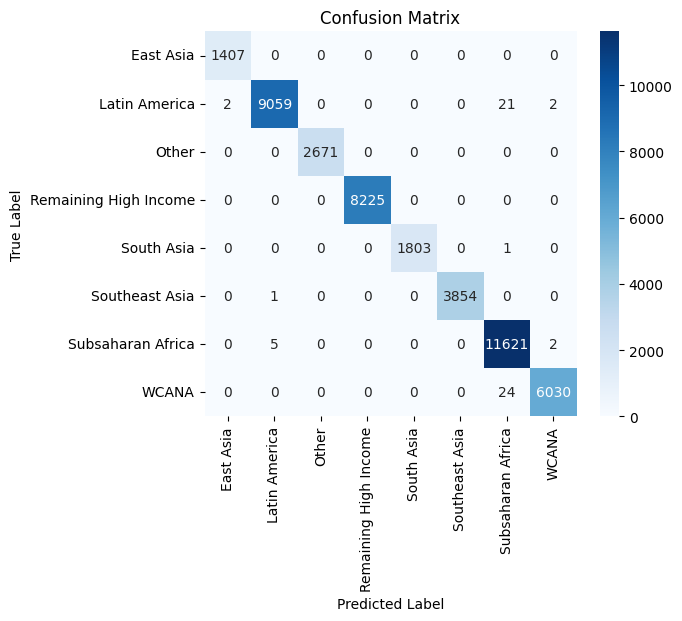

In [147]:
matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

train_score = best_rf.score(X_train_scaled, y_train)
test_score = best_rf.score(X_test_scaled, y_test)

print('Train score ', train_score )
print('Test score', test_score)
print('========')

# Step 3: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  #  'y_test' are the true labels
# Step 4: Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Observation
Random forests using the grid search optimised parameters leads to an extremly high prediction accuracy. This is extenuated by the now scaled yet unbalanced data. Additionally the afermentioned data leakage of the most important features is another cause of the extremely high accuracy. Evidently performing better than the previous Random Forests application.

## Dimensionality Reduction with PCA

PCA has the goal of dimensionality reduction, to transform high-dimensional data into a lower-dimensional representation to capture the most important information.

In [152]:
from sklearn.svm import LinearSVC # With PCA (not always better results, light vs complex model and high accuracy)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from time import time

#sc is MinMax scaler
pca = PCA(n_components=2)
test = df.drop(columns = ['Zone','Country', 'ISO3'], axis= 1)
test = sc.fit_transform(test)
result = pca.fit_transform(test)
print(result)

[[ 0.31766533  0.25846777]
 [ 0.27087196  0.45474073]
 [-0.81465279  0.19076874]
 ...
 [ 0.32815736  0.42800245]
 [ 0.26824755  0.20348072]
 [ 0.20031818  0.37488772]]


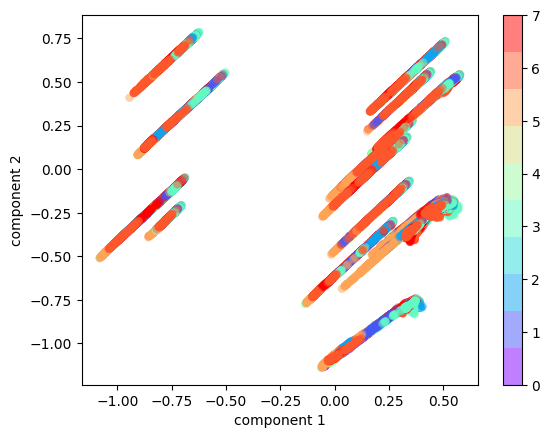

In [153]:
plt.scatter(result[:, 0], result[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [263]:
scaler = StandardScaler()
pca = PCA(n_components=2)
test = df.drop(columns = ['Zone','Country', 'ISO3'], axis= 1)
test = scaler.fit_transform(test)
result = pca.fit_transform(test)
print(result)

[[1.67314019 0.86756206]
 [1.57920336 1.66831617]
 [2.91103812 1.20914927]
 ...
 [0.60900491 1.41154594]
 [2.80207044 0.77933013]
 [2.97023014 1.54341468]]


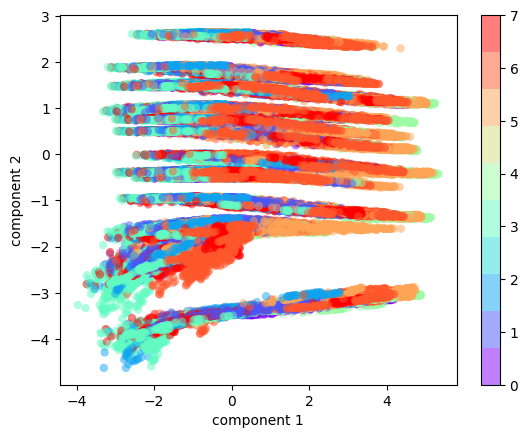

In [264]:
plt.scatter(result[:, 0], result[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Principal components compute the percentage of variance (information) accounted for by each component.

The full data is a 14-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance (highest infomration axes). Essentially, we have found the optimal stretch and rotation in 14-dimensional space that allows us to see the layout of the data in two dimensions, and we have done this in an unsupervised manner—that is, without reference to the labels.

i.e. There are clear splits of data representing the scaled data

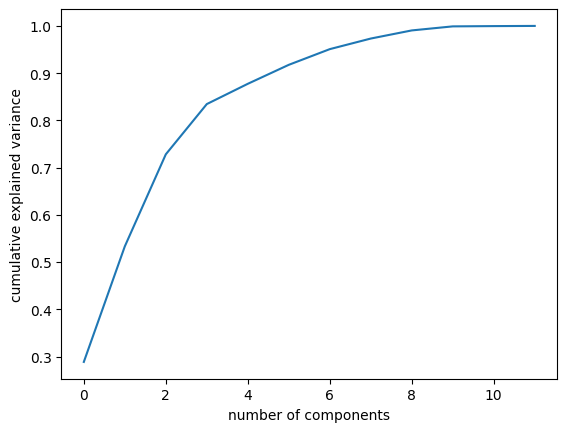

In [154]:
pca = PCA().fit(test) # this is choosing the correct number of dimensions to use in PCA whilst retaining info
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Shows 80% information from dataset can be maintained with 5 components. This would reduce the computational requirement without losing performance of Random Forest model.

## Dealing with Imbalanced data

In [155]:
test2 = df.drop(columns = ['ISO3'], axis= 1)

df['Zone'].value_counts()

Zone
6    29120
1    22568
3    20748
7    15050
5     9464
2     6860
4     4368
0     3640
Name: count, dtype: int64

In [156]:
test2.groupby('Zone').mean()

Country         Year  Population  Fortification        PCDEA  \
Zone                                                                    
0      91.200000  1986.480769   17.598237       0.019231  2485.926923   
1      69.419355  1986.480769   14.810468       0.019231  2442.385856   
2      74.726531  1990.459184   14.197292       0.026531  2876.018367   
3      87.760459  1987.914305   16.177483       0.022267  3231.489879   
4      88.500000  1986.480769   17.094194       0.019231  2185.221154   
5     101.384615  1986.480769   15.467663       0.019231  2264.828402   
6      85.825000  1986.480769   15.250320       0.019231  2172.146154   
7      90.101395  1989.208372   15.934171       0.024186  2689.315349   

           MDI  Tagname  Micronutrient     Units  Estimated Intake  \
Zone                                                                 
0     0.880013      6.5            6.5  0.714286          0.169752   
1     0.898233      6.5            6.5  0.714286          0.172241   
2     0.920496      6.5            6.5  0.714286          0.216440   
3     0.956708      6.5            6.5  0.714286          0.252949   
4     0.791108      6.5            6.5  0.714286          0.140989   
5     0.809562      6.5            6.5  0.714286          0.127863   
6     0.817960      6.5            6.5  0.714286          0.158758   
7     0.889730      6.5            6.5  0.714286          0.199950   

      Requirements  Prevalence of Inadequate Intake  \
Zone                                                  
0        -5.577927                        21.731158   
1        -5.612101                        20.801152   
2        -5.571017                        11.291413   
3        -5.541442                         4.618362   
4        -5.620941                        40.638085   
5        -5.622339                        37.598385   
6        -5.649759                        34.751785   
7        -5.611752                        17.229885   

      Inadequate Intake Population  
Zone                                
0                       378.867741  
1                       310.353688  
2                       154.302226  
3                        73.966512  
4                       707.563859  
5                       605.386283  
6                       527.548966  
7                       279.566176

In [157]:
X_test = test2.drop('Zone', axis = 1) # x is dataset to be trained which dropped target data (data we are predicting)
y_test = test2['Zone'] #contains the target data (data the model is attempting to predict for each record)

### Apply Over_Sampling SMOTE()

Formulating data for features with a lower count to balance dataset output values.

In [158]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [159]:
X = df.drop(columns = ['Zone','Country', 'ISO3'], axis= 1)
#X = df.drop(columns = ['Zone','Country', 'ISO3', 'Inadequate Intake Population', 'Population', 'PCDEA'], axis= 1)

y = df['Zone'] # our target value

In [160]:
over_sample = SMOTE()
X_OS, y_OS = over_sample.fit_resample(X, y) # AHD '1' is the minority class so oversampled to 160 like count of '0'

In [161]:
X_OS.shape

(232960, 12)

In [162]:
y_OS.shape

(232960,)

In [163]:
counter = Counter(y_OS)

In [164]:
print (counter)

Counter({7: 29120, 6: 29120, 2: 29120, 1: 29120, 3: 29120, 4: 29120, 5: 29120, 0: 29120})


In [165]:
y_OS.value_counts()

Zone
7    29120
6    29120
2    29120
1    29120
3    29120
4    29120
5    29120
0    29120
Name: count, dtype: int64

In [166]:
X_train_OS, X_test_OS, y_train_OS, y_test_OS = train_test_split(X_OS, y_OS, test_size=0.4, random_state=42)

Model -  K Nearest Neighbour
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11577
           1       0.83      0.82      0.82     11631
           2       0.85      0.90      0.88     11636
           3       0.93      0.90      0.91     11609
           4       0.93      0.95      0.94     11801
           5       0.92      0.89      0.90     11663
           6       0.91      0.91      0.91     11539
           7       0.88      0.80      0.84     11728

    accuracy                           0.89     93184
   macro avg       0.89      0.89      0.89     93184
weighted avg       0.89      0.89      0.89     93184



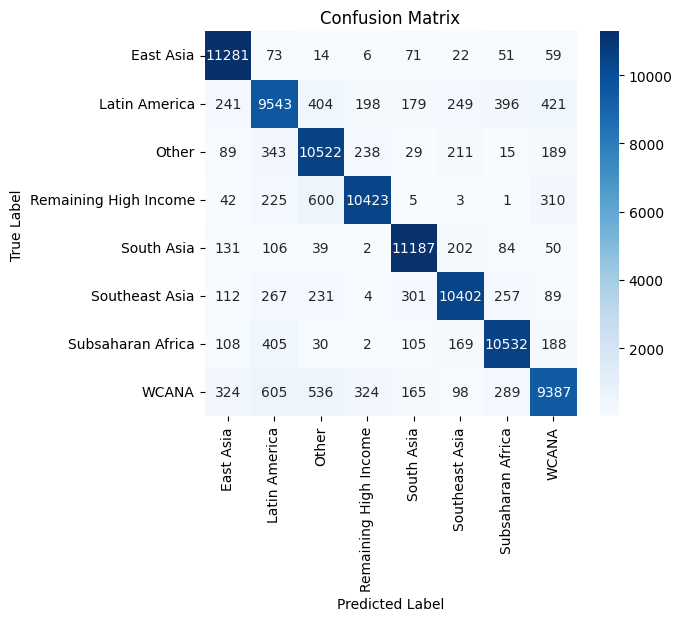

Model -  Random Forest Classifier(using Grid Search Parameters)
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11577
           1       0.97      0.95      0.96     11631
           2       0.97      0.97      0.97     11636
           3       0.98      0.99      0.99     11609
           4       0.97      0.97      0.97     11801
           5       0.97      0.95      0.96     11663
           6       0.96      1.00      0.98     11539
           7       0.96      0.96      0.96     11728

    accuracy                           0.97     93184
   macro avg       0.97      0.97      0.97     93184
weighted avg       0.97      0.97      0.97     93184



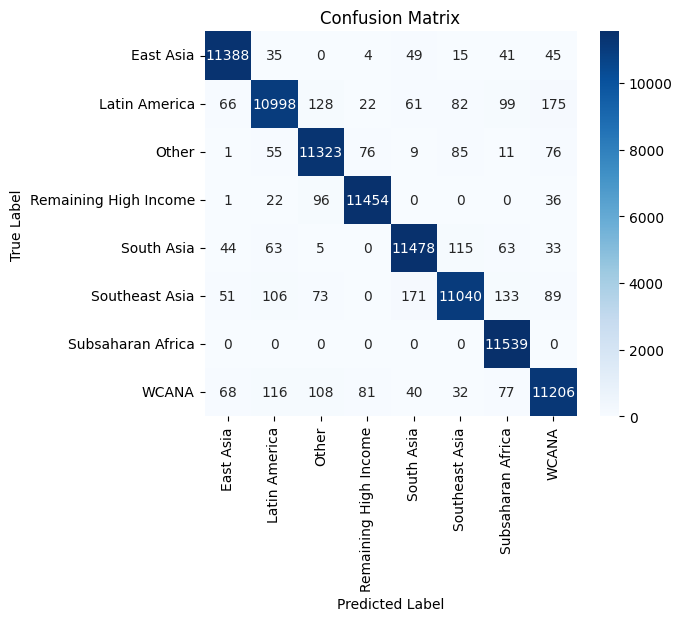

Model -  Random Forest Classifier
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11577
           1       0.96      0.95      0.95     11631
           2       0.97      0.98      0.97     11636
           3       0.98      0.99      0.98     11609
           4       0.97      0.98      0.98     11801
           5       0.97      0.96      0.97     11663
           6       0.96      0.99      0.98     11539
           7       0.97      0.94      0.95     11728

    accuracy                           0.97     93184
   macro avg       0.97      0.97      0.97     93184
weighted avg       0.97      0.97      0.97     93184



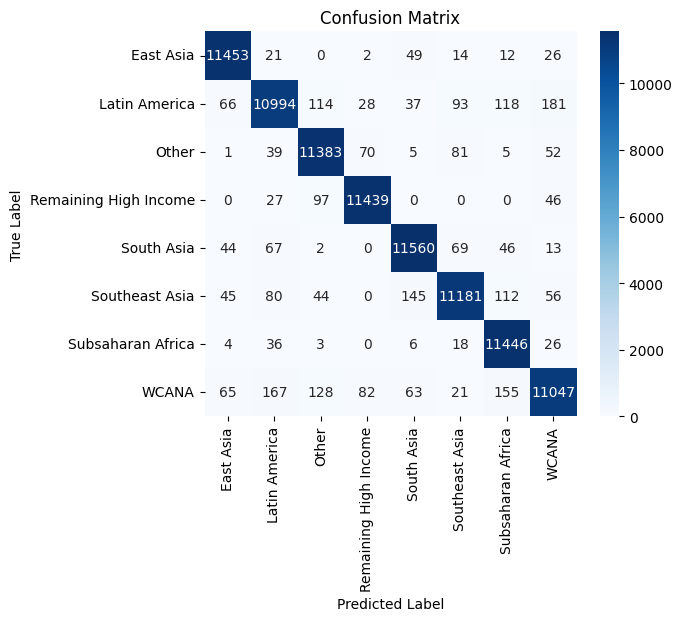

Model -  Decision Tree Classifier
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11577
           1       0.92      0.93      0.93     11631
           2       0.95      0.94      0.95     11636
           3       0.98      0.98      0.98     11609
           4       0.96      0.95      0.95     11801
           5       0.94      0.93      0.93     11663
           6       0.96      0.99      0.98     11539
           7       0.93      0.92      0.92     11728

    accuracy                           0.95     93184
   macro avg       0.95      0.95      0.95     93184
weighted avg       0.95      0.95      0.95     93184



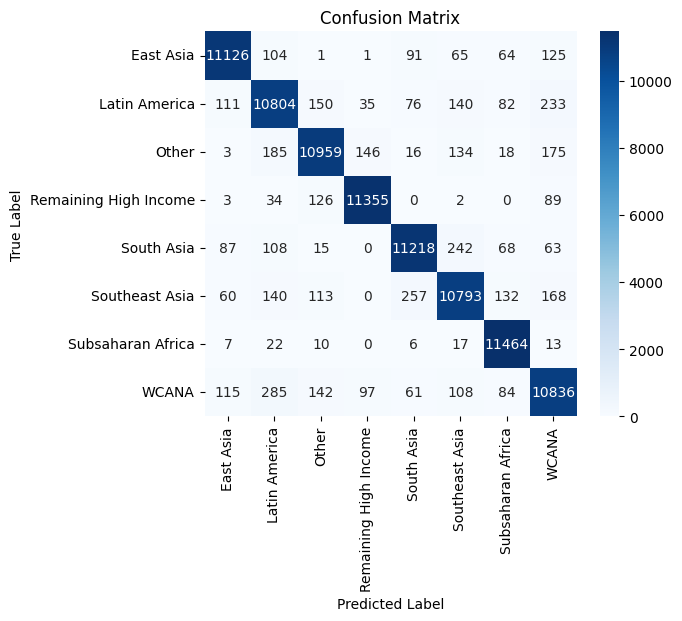

In [167]:
scaler = StandardScaler()
X_train_scaled_OS = scaler.fit_transform(X_train_OS)
X_test_scaled_OS = scaler.transform(X_test_OS)

# Initialize the models
models = {
    "K Nearest Neighbour": KNeighborsClassifier(n_neighbors=3),
    "Random Forest Classifier(using Grid Search Parameters)": RandomForestClassifier(max_features = 8, n_estimators=30, random_state=42), #using grid search params
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(),
}

# Create a DataFrame to store actual vs predicted values
results_df = pd.DataFrame(columns=["Model", "y_test", "y_pred"])

# Train models, predict, and store actual vs predicted values
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled_OS, y_train_OS)

    # Make predictions
    y_pred_OS = model.predict(X_test_scaled_OS)

    # Store the results in the DataFrame
    temp_df = pd.DataFrame({
        "Model": [model_name] * len(y_test_OS),  # Add model name to each row
        "y_test": y_test_OS,
        "y_pred": y_pred_OS
        })

    matrix = confusion_matrix(y_test_OS, y_pred_OS)
    accuracy = accuracy_score(y_test_OS, y_pred_OS)
    print("Model - ", model_name)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test_OS, y_pred_OS))
    label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
    pd.DataFrame(matrix,
        columns='Predicted ' + label_names,
        index='Is ' + label_names)

    conf_matrix = confusion_matrix(y_test_OS, y_pred_OS)  #  'y_test' are the true labels

    # Step 4: Display the confusion matrix using a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Display the DataFrame with y_test and y_pred
#results_df.head()

### Observation

Despite synthetic data, K nearest neighbour is still able to predict with high f1-score and accuracy and should be tested on test data without synthesised data. The Random Forest Classifier with and without gridsearch perform similarly well for differing computational load. Decision Tree classifier performs expectedly worse than Random Forests yet still out performs KNN.

### Apply Under_Sampling - NearMiss
It works by selecting samples closest to the minority class and deletes records so all cetegories has the same number of samples.

In [168]:
from imblearn.under_sampling import NearMiss

In [169]:
X = df.drop(columns = ['Zone','Country', 'ISO3'], axis= 1)
#X = df.drop(columns = ['Zone','Country', 'ISO3', 'Inadequate Intake Population', 'Population', 'PCDEA'], axis= 1)

y = df['Zone'] # our target value

In [170]:
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y) # AHD '1' is the minority class so oversampled to 160 like count of '0'

In [171]:
X_nm.shape

(29120, 12)

In [172]:
y_nm.shape

(29120,)

In [173]:
counter = Counter(y_nm)

In [174]:
print (counter)

Counter({0: 3640, 1: 3640, 2: 3640, 3: 3640, 4: 3640, 5: 3640, 6: 3640, 7: 3640})


In [175]:
y_nm.value_counts()

Zone
0    3640
1    3640
2    3640
3    3640
4    3640
5    3640
6    3640
7    3640
Name: count, dtype: int64

In [176]:
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=0.4, random_state=42)

Model -  K Nearest Neighbour
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1465
           1       0.67      0.71      0.69      1416
           2       0.74      0.76      0.75      1479
           3       0.81      0.79      0.80      1474
           4       0.93      0.93      0.93      1470
           5       0.85      0.87      0.86      1459
           6       0.87      0.83      0.84      1456
           7       0.78      0.68      0.73      1429

    accuracy                           0.81     11648
   macro avg       0.81      0.81      0.81     11648
weighted avg       0.81      0.81      0.81     11648



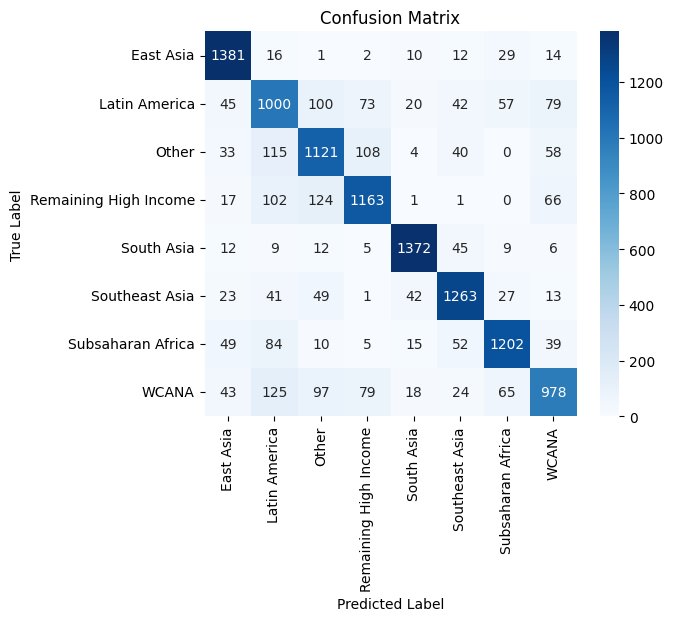

Model -  Random Forest Classifier(using Grid Search Parameters)
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1465
           1       0.97      0.95      0.96      1416
           2       0.99      0.99      0.99      1479
           3       1.00      1.00      1.00      1474
           4       0.99      0.99      0.99      1470
           5       0.96      0.99      0.98      1459
           6       0.96      0.96      0.96      1456
           7       0.97      0.94      0.96      1429

    accuracy                           0.98     11648
   macro avg       0.98      0.98      0.98     11648
weighted avg       0.98      0.98      0.98     11648



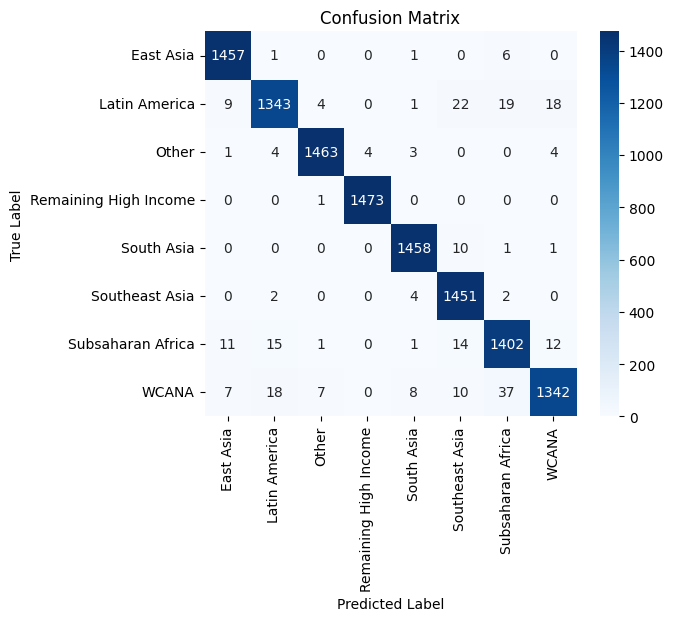

Model -  Random Forest Classifier
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1465
           1       0.95      0.91      0.93      1416
           2       0.96      0.97      0.97      1479
           3       0.99      0.99      0.99      1474
           4       0.97      0.99      0.98      1470
           5       0.94      0.97      0.95      1459
           6       0.94      0.95      0.95      1456
           7       0.96      0.92      0.94      1429

    accuracy                           0.96     11648
   macro avg       0.96      0.96      0.96     11648
weighted avg       0.96      0.96      0.96     11648



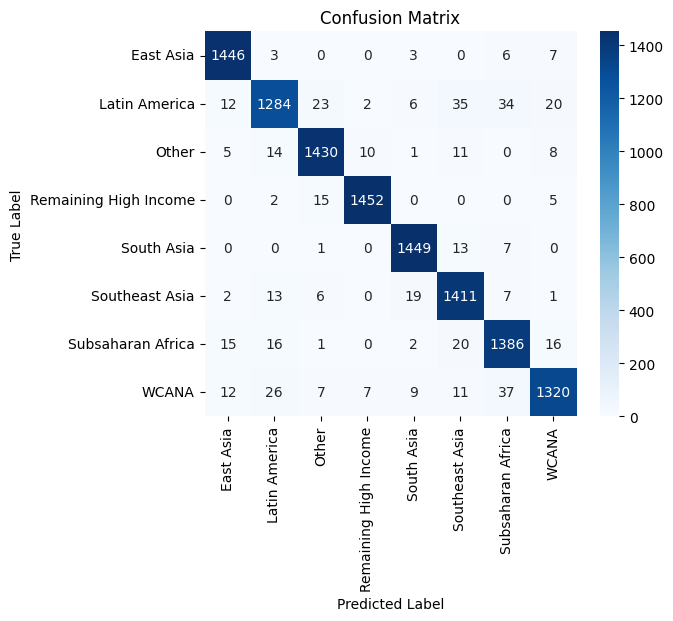

Model -  Decision Tree Classifier
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1465
           1       0.91      0.90      0.90      1416
           2       0.97      0.96      0.96      1479
           3       0.99      1.00      0.99      1474
           4       0.98      0.98      0.98      1470
           5       0.95      0.96      0.96      1459
           6       0.91      0.91      0.91      1456
           7       0.91      0.91      0.91      1429

    accuracy                           0.95     11648
   macro avg       0.95      0.95      0.95     11648
weighted avg       0.95      0.95      0.95     11648



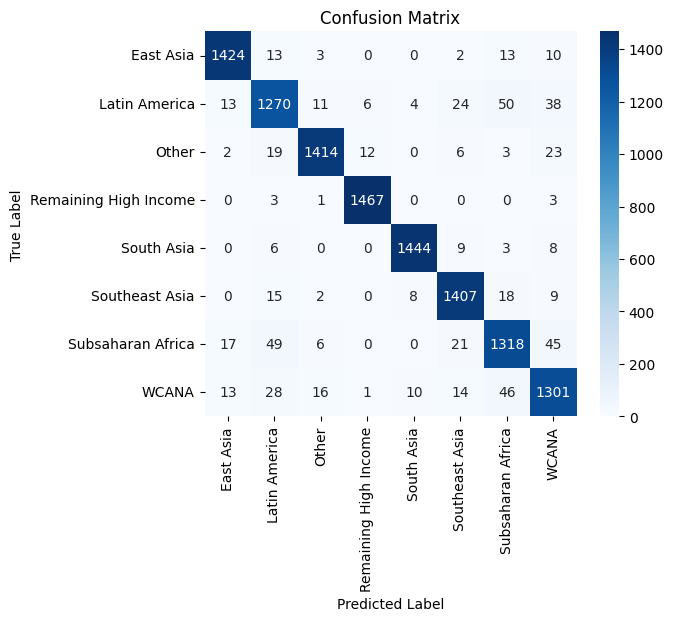

In [177]:
scaler = StandardScaler()
X_train_scaled_nm = scaler.fit_transform(X_train_nm)
X_test_scaled_nm = scaler.transform(X_test_nm)

# Initialize the models
models = {
    "K Nearest Neighbour": KNeighborsClassifier(n_neighbors=3),
    "Random Forest Classifier(using Grid Search Parameters)": RandomForestClassifier(max_features = 8, n_estimators=30, random_state=42), #using grid search params
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(),
  }

# Create a DataFrame to store actual vs predicted values
results_df = pd.DataFrame(columns=["Model", "y_test", "y_pred"])

# Train models, predict, and store actual vs predicted values
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled_nm, y_train_nm)

    # Make predictions
    y_pred_nm = model.predict(X_test_scaled_nm)

    # Store the results in the DataFrame
    temp_df = pd.DataFrame({
        "Model": [model_name] * len(y_test_nm),  # Add model name to each row
        "y_test": y_test_nm,
        "y_pred": y_pred_nm
        })

    matrix = confusion_matrix(y_test_nm, y_pred_nm)
    accuracy = accuracy_score(y_test_nm, y_pred_nm)
    print("Model - ", model_name)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test_nm, y_pred_nm))
    label_names = pd.Series(['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
    pd.DataFrame(matrix,
        columns='Predicted ' + label_names,
        index='Is ' + label_names)

    conf_matrix = confusion_matrix(y_test_nm, y_pred_nm)  #  'y_test' are the true labels

    # Step 4: Display the confusion matrix using a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Display the DataFrame with y_test and y_pred
#results_df.head()

### Observation

KNN performs less accurately than when oversampled, Random Forest with Grid Search params performs the best of all algorithms with minimal spread on inaccuracy.

# Deep Learning

Deep learning utlises layered nodes with input and activation nodes which output based on their function type. Deep Learning utilises a loss function which determines the weight change in each epoch until the loss function is successfully minimised or epoch number is reached.

In [178]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(12, activation="relu"),
    layers.Dense(12, activation="relu"),
    layers.Dense(8, activation="softmax") #will give me a probablity of whether the sentiment is 1 or 0
])

Softmax is a activation function similar to sigmoid. Soft max applies to multiclass problems which is suited to the problem as 'zone' is separated over 8 potential classifications. Additionally soft max is already vectorised "meaning that takes a vector with the same number of entries as classes we have and outputs another vector where each component represents the probability of belonging to that class".

[Sigmoid vs SoftMax Article](https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9)

### Onehot Encoding

In [179]:
onehot = pd.get_dummies(df.Zone,dtype=int)

In [180]:
onehot

0  1  2  3  4  5  6  7
0       0  0  0  0  0  0  0  1
1       0  0  0  0  0  0  0  1
2       0  0  0  0  0  0  0  1
3       0  0  0  0  0  0  0  1
4       0  0  0  0  0  0  0  1
...    .. .. .. .. .. .. .. ..
111813  0  0  0  0  0  0  1  0
111814  0  0  0  0  0  0  1  0
111815  0  0  0  0  0  0  1  0
111816  0  0  0  0  0  0  1  0
111817  0  0  0  0  0  0  1  0

[111818 rows x 8 columns]

In [181]:
df['Zone_East_Asia'] = onehot[0]
df['Zone_Latin_America'] = onehot[1]
df['Zone_Other'] = onehot[2]
df['Remaining_High_Income'] = onehot[3]
df['Zone_South_Asia'] = onehot[4]
df['Zone_Southeast_Asia'] = onehot[5]
df['Zone_Subsaharan_Africa'] = onehot[6]
df['Zone_WCANA'] = onehot[7]
#df=df.drop(columns=['East Asia'],axis=1)
#df=df.drop(columns=['Zone_East Asia', 'Zone_Latin_America', 'Zone_Other', 'Zone_Remaining_High_Income','Zone_South_Asia', 'Zone_Southeast_Asia', 'Zone_Subsaharan_Africa', 'Zone_WCANA' ], axis=1)

Creating separate columns for each Zone category in binary, in order to get no multilabel errors stopping confusion matrix being shown.

In [182]:

X = df.drop(columns = ['Zone','Country', 'ISO3','Zone_East_Asia','Zone_Latin_America','Zone_Other','Remaining_High_Income','Zone_South_Asia','Zone_Southeast_Asia','Zone_Subsaharan_Africa','Zone_WCANA'], axis= 1)
#X = df.drop(columns = ['Zone','Country', 'ISO3', 'Inadequate Intake Population', 'Population', 'PCDEA'], axis= 1)
y = df.drop(columns = ['Zone','Country', 'ISO3', 'Inadequate Intake Population', 'Population', 'PCDEA','Fortification', 'PCDEA', 'Year','MDI','Tagname','Micronutrient', 'Units','Estimated Intake','Requirements','Prevalence of Inadequate Intake'], axis=1) # our target values

In [183]:
X

Year  Population  Fortification  PCDEA       MDI  Tagname  \
0       1961   16.007611              0   2997  0.773239       12   
1       1961   16.007611              0   2997  0.773239       13   
2       1961   16.007611              0   2997  0.773239        9   
3       1961   16.007611              0   2997  0.773239        0   
4       1961   16.007611              0   2997  0.773239        1   
...      ...         ...            ...    ...       ...      ...   
111813  2011   16.407701              0   2196  0.709258        9   
111814  2011   16.407701              0   2196  0.709258       10   
111815  2011   16.407701              0   2196  0.709258       11   
111816  2011   16.407701              0   2196  0.709258       12   
111817  2011   16.407701              0   2196  0.709258       13   

        Micronutrient  Units  Estimated Intake  Requirements  \
0                  12      1          0.040922     -2.996626   
1                  13      1          0.001677     -6.336924   
2                   9      0          0.000275     -7.677056   
3                   0      1          0.700043     -0.244506   
4                   1      0          0.001979     -7.472281   
...               ...    ...               ...           ...   
111813              9      0          0.000209     -7.658752   
111814             10      0          0.000001    -13.314735   
111815             11      1          0.001168     -6.973904   
111816             12      1          0.033915     -2.970639   
111817             13      1          0.001359     -6.314446   

        Prevalence of Inadequate Intake  Inadequate Intake Population  
0                             62.746266                   1004.417816  
1                             58.326559                    933.668865  
2                             84.225561                   1348.250017  
3                             63.814563                   1021.518689  
4                              0.090734                      1.452427  
...                                 ...                           ...  
111813                        95.388542                   1565.106663  
111814                        33.580498                    550.978761  
111815                        16.055914                    263.440640  
111816                        81.059120                   1329.993796  
111817                        84.063915                   1379.295570  

[111818 rows x 12 columns]

In [184]:
y

Zone_East_Asia  Zone_Latin_America  Zone_Other  Remaining_High_Income  \
0                    0                   0           0                      0   
1                    0                   0           0                      0   
2                    0                   0           0                      0   
3                    0                   0           0                      0   
4                    0                   0           0                      0   
...                ...                 ...         ...                    ...   
111813               0                   0           0                      0   
111814               0                   0           0                      0   
111815               0                   0           0                      0   
111816               0                   0           0                      0   
111817               0                   0           0                      0   

        Zone_South_Asia  Zone_Southeast_Asia  Zone_Subsaharan_Africa  \
0                     0                    0                       0   
1                     0                    0                       0   
2                     0                    0                       0   
3                     0                    0                       0   
4                     0                    0                       0   
...                 ...                  ...                     ...   
111813                0                    0                       1   
111814                0                    0                       1   
111815                0                    0                       1   
111816                0                    0                       1   
111817                0                    0                       1   

        Zone_WCANA  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
111813           0  
111814           0  
111815           0  
111816           0  
111817           0  

[111818 rows x 8 columns]

In [185]:

# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [186]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [187]:
x_val = X_train[:1000]  # validation set
partial_x_train = X_train[1000:] # training set
y_val = y_train[:1000] #validation labels
partial_y_train = y_train[1000:] # training labels

In [265]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(partial_x_train.shape, x_val.shape, partial_y_train.shape, y_val.shape)

(44727, 12) (67091, 12) (44727, 8) (67091, 8)
(16472, 12) (1000, 12) (16472,) (1000,)


In [188]:
partial_x_train

Year  Population  Fortification  PCDEA       MDI  Tagname  \
108482  1961   15.461088              0   1790  0.784931        7   
28957   2008   17.391361              0   3041  0.864919        8   
105008  1973   11.451050              0   2258  0.849743        8   
101732  1989   17.021747              0   2274  0.802687        0   
13508   1996   12.483704              0   2886  0.951139        3   
...      ...         ...            ...    ...       ...      ...   
76820   2001   15.322916              0   3409  0.945854        9   
110268  2006   17.705676              0   2917  0.788786        0   
103694  2004   15.016679              0   2797  0.968358       11   
860     1970   15.595197              0   1965  0.859786       11   
15795   2004   15.174947              0   1978  0.901079        8   

        Micronutrient  Units  Estimated Intake  Requirements  \
108482              7      1          0.000795     -7.078509   
28957               8      1          0.001572     -7.070155   
105008              8      1          0.000929     -7.175164   
101732              0      1          0.529508     -0.248230   
13508               2      0          0.000312     -8.130738   
...               ...    ...               ...           ...   
76820               9      0          0.000792     -7.565084   
110268              0      1          0.609614     -0.186268   
103694             11      1          0.002149     -6.852704   
860                11      1          0.001410     -7.007274   
15795               8      1          0.000985     -7.142961   

        Prevalence of Inadequate Intake  Inadequate Intake Population  
108482                        57.561110                    889.957359  
28957                          0.232504                      4.043568  
105008                        23.765233                    272.136872  
101732                        85.791581                   1460.322567  
13508                         41.890967                    522.954446  
...                                 ...                           ...  
76820                         11.488314                    176.034462  
110268                        81.198502                   1437.674409  
103694                         0.001777                      0.026687  
860                            1.291828                     20.146309  
15795                         20.543928                    311.753026  

[43727 rows x 12 columns]

In [189]:
partial_y_train

Zone_East_Asia  Zone_Latin_America  Zone_Other  Remaining_High_Income  \
108482               0                   0           0                      0   
28957                0                   0           0                      0   
105008               0                   1           0                      0   
101732               0                   0           0                      0   
13508                0                   1           0                      0   
...                ...                 ...         ...                    ...   
76820                0                   0           0                      1   
110268               0                   0           0                      0   
103694               0                   1           0                      0   
860                  0                   0           0                      0   
15795                0                   0           0                      0   

        Zone_South_Asia  Zone_Southeast_Asia  Zone_Subsaharan_Africa  \
108482                0                    0                       0   
28957                 0                    0                       0   
105008                0                    0                       0   
101732                0                    0                       1   
13508                 0                    0                       0   
...                 ...                  ...                     ...   
76820                 0                    0                       0   
110268                0                    0                       1   
103694                0                    0                       0   
860                   0                    0                       1   
15795                 0                    0                       1   

        Zone_WCANA  
108482           1  
28957            1  
105008           0  
101732           0  
13508            0  
...            ...  
76820            0  
110268           0  
103694           0  
860              0  
15795            0  

[43727 rows x 8 columns]

In [190]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1874 - loss: 305.5419 - val_accuracy: 0.2660 - val_loss: 53.7533
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2817 - loss: 31.5899 - val_accuracy: 0.2080 - val_loss: 10.4483
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2597 - loss: 8.8804 - val_accuracy: 0.2290 - val_loss: 4.0953
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1639 - loss: 2.9405 - val_accuracy: 0.2300 - val_loss: 1.9357
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3704 - loss: 1.8979 - val_accuracy: 0.3730 - val_loss: 1.8653
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3872 - loss: 1.8523 - val_accuracy: 0.4180 - val_loss: 1.9846
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3950 - loss: 1.8135 - val_accuracy: 0.3900 - val_loss: 1.7674
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4053 - loss: 1.7440 - val_accuracy: 0.402

In [191]:
#the call to model.fit() returns a History object.This object has a member history, which is a dictionary containing data about everything that happened during training.
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

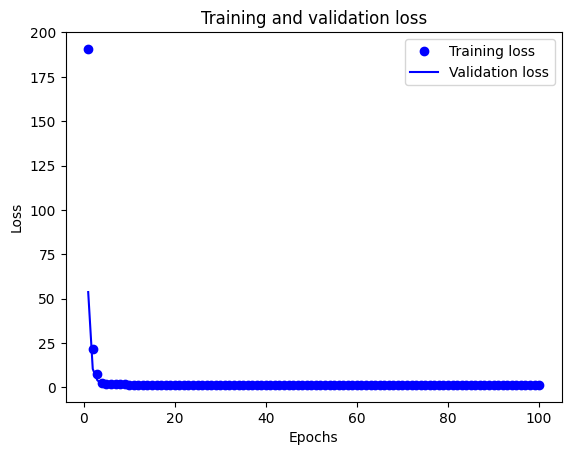

In [192]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1) #epochs axis values
plt.plot(epochs, loss_values, "bo", label="Training loss") #"bo" is for "blue dot."
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #"b" is for "solid blue line." / Accuracy
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Shows as number of ephochs increase from around 10, validation and training loss decreases significantly before begining to plateu with little to no improvement as epochs increase.

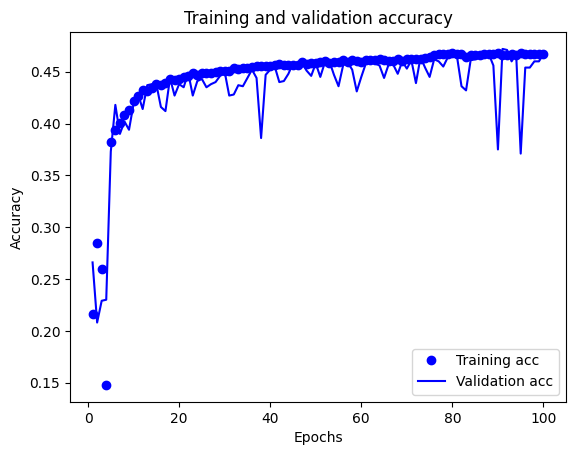

In [193]:
plt.clf() #Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As epochs increase, after 10 epochs, there is a linear positive correlation in training accuracy. Validation accuracy increases to extreme peaks and troughs throughout the increasing epochs but generally trends in line with Training accuracy in a positive correlation.

In [266]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1992 - loss: 158.4365
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2580 - loss: 6.8358
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3139 - loss: 4.2517
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3480 - loss: 3.8994
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3634 - loss: 3.5680
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3585 - loss: 3.3465
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3597 - loss: 3.0896
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3741 - loss: 2.8049
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3856 - loss: 2.7635
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 2.6146
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3864 - loss: 2.6082
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

In [267]:
#The first number is the test loss (we want minimised), and the second number is the test accuracy (we want maximised)
results

[1.4502724409103394, 0.4710467755794525]

In [268]:
y_pred_prob= model.predict(X_test)

2097/2097 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [269]:

y_pred_classes = (y_pred_prob > 0.5).astype(int)

In [270]:
print(y_test)

       Zone_East_Asia  Zone_Latin_America  Zone_Other  Remaining_High_Income  \
35669               0                   0           0                      1   
75269               0                   1           0                      0   
23315               0                   0           0                      1   
77486               0                   0           0                      0   
82830               1                   0           0                      0   
...               ...                 ...         ...                    ...   
30700               0                   0           0                      1   
22362               0                   0           0                      0   
28631               0                   0           0                      0   
21009               0                   0           0                      0   
4071                0                   1           0                      0   

       Zone_South_Asia  Zone_Southeast_

In [271]:
print(y_pred_classes)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [272]:
print(y_test.loc[:, 'Zone_East_Asia'])

35669    0
75269    0
23315    0
77486    0
82830    1
        ..
30700    0
22362    0
28631    0
21009    0
4071     0
Name: Zone_East_Asia, Length: 67091, dtype: int64


In [273]:
# Creating pandas dataframe from numpy array
dataset = pd.DataFrame(y_pred_classes)
print(dataset)

       0  1  2  3  4  5  6  7
0      0  0  0  1  0  0  0  0
1      0  0  0  0  0  0  1  0
2      0  0  0  1  0  0  0  0
3      0  0  0  0  0  0  1  0
4      0  0  0  0  0  0  0  0
...   .. .. .. .. .. .. .. ..
67086  0  0  0  1  0  0  0  0
67087  0  0  0  0  0  0  0  0
67088  0  0  0  0  0  0  0  0
67089  0  0  0  0  0  0  1  0
67090  0  0  0  0  0  0  0  0

[67091 rows x 8 columns]


In [274]:
print(y_test.loc[:,'Zone_East_Asia'], dataset.loc[:,0])

35669    0
75269    0
23315    0
77486    0
82830    1
        ..
30700    0
22362    0
28631    0
21009    0
4071     0
Name: Zone_East_Asia, Length: 67091, dtype: int64 0        0
1        0
2        0
3        0
4        0
        ..
67086    0
67087    0
67088    0
67089    0
67090    0
Name: 0, Length: 67091, dtype: int64


Zone_East_Asia


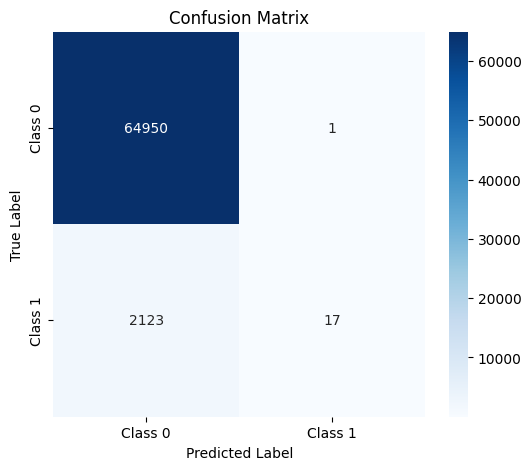

              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98     64951
     class 1       0.94      0.01      0.02      2140

    accuracy                           0.97     67091
   macro avg       0.96      0.50      0.50     67091
weighted avg       0.97      0.97      0.95     67091

Zone_Latin_America


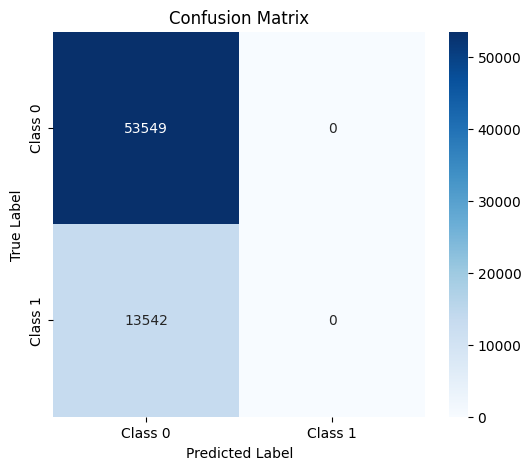

              precision    recall  f1-score   support

     Class 0       0.80      1.00      0.89     53549
     class 1       0.00      0.00      0.00     13542

    accuracy                           0.80     67091
   macro avg       0.40      0.50      0.44     67091
weighted avg       0.64      0.80      0.71     67091

Zone_Other


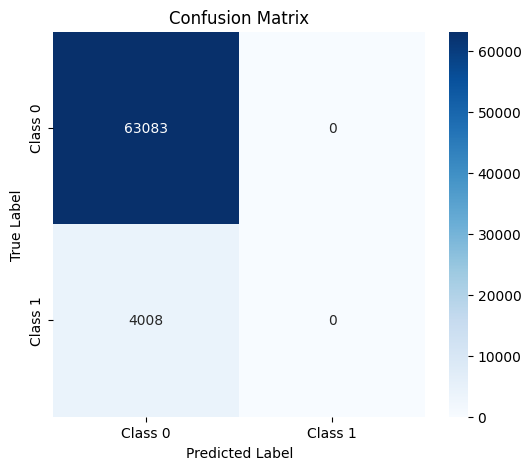

              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97     63083
     class 1       0.00      0.00      0.00      4008

    accuracy                           0.94     67091
   macro avg       0.47      0.50      0.48     67091
weighted avg       0.88      0.94      0.91     67091

Remaining_High_Income


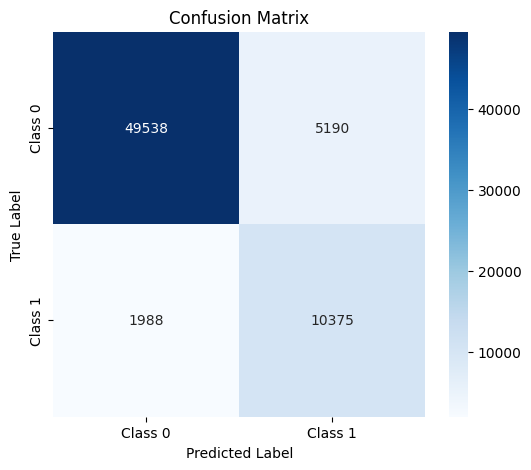

              precision    recall  f1-score   support

     Class 0       0.96      0.91      0.93     54728
     class 1       0.67      0.84      0.74     12363

    accuracy                           0.89     67091
   macro avg       0.81      0.87      0.84     67091
weighted avg       0.91      0.89      0.90     67091

Zone_South_Asia


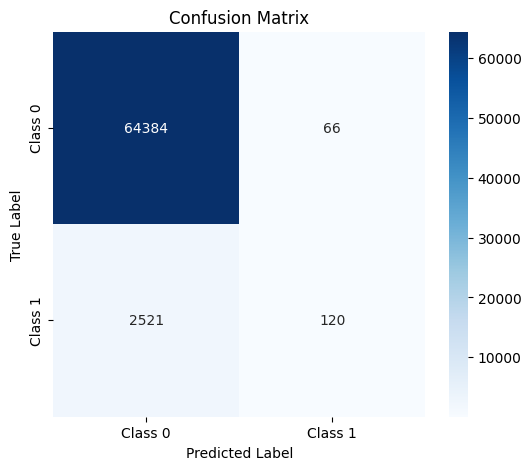

              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98     64450
     class 1       0.65      0.05      0.08      2641

    accuracy                           0.96     67091
   macro avg       0.80      0.52      0.53     67091
weighted avg       0.95      0.96      0.95     67091

Zone_Southeast_Asia


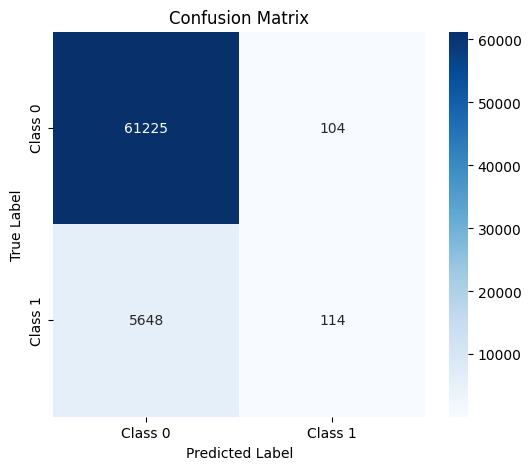

              precision    recall  f1-score   support

     Class 0       0.92      1.00      0.96     61329
     class 1       0.52      0.02      0.04      5762

    accuracy                           0.91     67091
   macro avg       0.72      0.51      0.50     67091
weighted avg       0.88      0.91      0.88     67091

Zone_Subsaharan_Africa


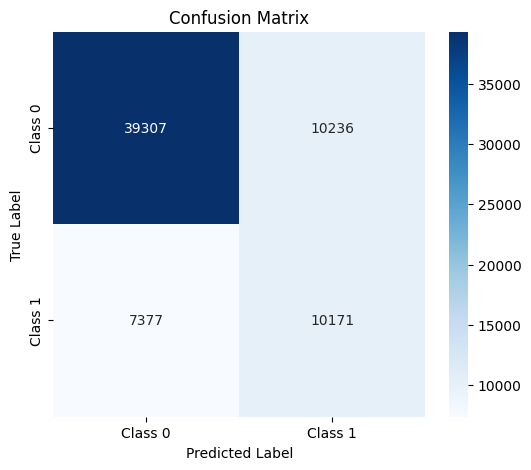

              precision    recall  f1-score   support

     Class 0       0.84      0.79      0.82     49543
     class 1       0.50      0.58      0.54     17548

    accuracy                           0.74     67091
   macro avg       0.67      0.69      0.68     67091
weighted avg       0.75      0.74      0.74     67091

Zone_WCANA


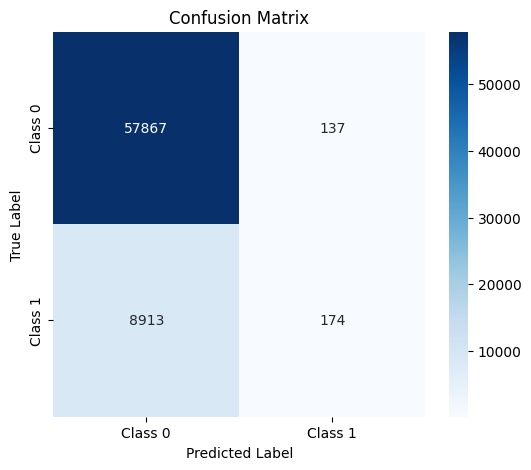

              precision    recall  f1-score   support

     Class 0       0.87      1.00      0.93     58004
     class 1       0.56      0.02      0.04      9087

    accuracy                           0.87     67091
   macro avg       0.71      0.51      0.48     67091
weighted avg       0.82      0.87      0.81     67091



In [275]:
items = ['Zone_East_Asia', 'Zone_Latin_America', 'Zone_Other', 'Remaining_High_Income','Zone_South_Asia', 'Zone_Southeast_Asia', 'Zone_Subsaharan_Africa', 'Zone_WCANA' ]
matrix_lst = []
count = 0
for item in items:
  print(item)
  conf_matrix = confusion_matrix(y_test.loc[:,item], dataset.loc[:,count])  #  'y_test' are the true labels, dataset is y_prob in dataframe form

  plt.figure(figsize=(6, 5))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.show()

  #matrix.append(conf_matrix)
  print(classification_report(y_test.loc[:,item], dataset.loc[:,count], target_names=['Class 0','class 1']))
  count +=1

### Observation

Had to initially convert y from nd.array format back to a dataframe type and then compare the prediction for each category individually and independant of eachother. Overall the results for each category is predicted to a satisfactory f1-score and accuracy. Many False Negative predictions can be seen in Latin America and WCANA predictions. Many false positives in siutheast asia and Remaining High income.

The Class1 true and predicted id data correctly classifying the item not being in the column "0" for this category (already classified in other category).

Train test split for Over sampling and near miss struggles to deal with one hot encoded train test split.



```
over_sample = SMOTE()
X_OS, y_OS = over_sample.fit_resample(X, y) # AHD '1' is the minority class so oversampled to 160 like count of '0'
X_train_OS, X_test_OS, y_train_OS, y_test_OS = train_test_split(X_OS, y_OS, test_size=0.4, random_state=42)
```



---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-121-fe1ba934288c> in <cell line: 2>()
      1 over_sample = SMOTE()
----> 2 X_OS, y_OS = over_sample.fit_resample(X, y) # AHD '1' is the minority class so oversampled to 160 like count of '0'
      3 X_train_OS, X_test_OS, y_train_OS, y_test_OS = train_test_split(X_OS, y_OS, test_size=0.4, random_state=42)

4 frames
/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py in __getattr__(self, name)
   6297         ):
   6298             return self[name]
-> 6299         return object.__getattribute__(self, name)
   6300
   6301     @final

AttributeError: 'DataFrame' object has no attribute 'argmax'

## Deep Learning Near Miss

In [241]:
#resetting dataframe
url = 'https://raw.githubusercontent.com/panuj456/MicronutrientCSV/refs/heads/main/S4Dataset.csv'
df = pd.read_csv(url,sep=",", encoding='cp1252')

df['Requirements'] = np.log(df['Requirements'])
#df['Estimated Intake'] = np.log(df['Estimated Intake'])

#df['MDI'] = np.log(df['MDI'])
#df['Fortification'] = np.log(df['Fortification']) #uncommented causes all other histograms to go blank??
df['Population'] = np.log(df['Population'])

le = LabelEncoder()
df['Zone'] = le.fit_transform(df['Zone'])
df['Country'] = le.fit_transform(df['Country'])
df['Units'] = le.fit_transform(df['Units'])
df['Tagname'] = le.fit_transform(df['Tagname'])
df['Micronutrient'] = le.fit_transform(df['Micronutrient'])
df['Inadequate Intake Population'] = df['Prevalence of Inadequate Intake'] * df['Population']


In [242]:
X = df.drop(columns = ['Zone','Country', 'ISO3'], axis= 1)
#X = df.drop(columns = ['Zone','Country', 'ISO3', 'Inadequate Intake Population', 'Population', 'PCDEA'], axis= 1)
y = df['Zone']

In [243]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="softmax") #will give me a probablity of whether the sentiment is 1 or 0
])

In [244]:
df.head()

Zone  Country ISO3  Year  Population  Fortification  PCDEA       MDI  \
0     7        0  AFG  1961   16.007611              0   2997  0.773239   
1     7        0  AFG  1961   16.007611              0   2997  0.773239   
2     7        0  AFG  1961   16.007611              0   2997  0.773239   
3     7        0  AFG  1961   16.007611              0   2997  0.773239   
4     7        0  AFG  1961   16.007611              0   2997  0.773239   

   Tagname  Micronutrient  Units  Estimated Intake  Requirements  \
0       12             12      1          0.040922     -2.996626   
1       13             13      1          0.001677     -6.336924   
2        9              9      0          0.000275     -7.677056   
3        0              0      1          0.700043     -0.244506   
4        1              1      0          0.001979     -7.472281   

   Prevalence of Inadequate Intake  Inadequate Intake Population  
0                        62.746266                   1004.417816  
1                        58.326559                    933.668865  
2                        84.225561                   1348.250017  
3                        63.814563                   1021.518689  
4                         0.090734                      1.452427

Attempted to one hot with y variable which was a series so instead of a new column, the entire column was added as a row.

In [245]:
# # Split the dataset into training and testing sets
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y) # AHD '1' is the minority class so oversampled to 160 like count of '0'

X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=0.4, random_state=42)

In [246]:
x_val = X_train_nm[:1000]  # validation set
partial_x_train = X_train_nm[1000:] # training set
y_val = y_train_nm[:1000] #validation labels
partial_y_train = y_train_nm[1000:] # training labels

In [247]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train_nm, y_train_nm, epochs=20, batch_size=512)
results = model.evaluate(X_test_nm, y_test_nm)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1266 - loss: -3295.5022
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1245 - loss: -7393.0220
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1248 - loss: -13017.3994
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1269 - loss: -20510.9277
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1282 - loss: -30058.1953  
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1245 - loss: -42128.2266 
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1286 - loss: -55704.7109
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1239 - loss: -73648.5078
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1245 - loss: -93645.6016 
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1258 - loss: -117308.3359 
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1290 - loss: -143257.4688 
Epoch 12/20
3

In [248]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1298 - loss: -661196.8125 - val_accuracy: 0.1370 - val_loss: -713733.5625
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1269 - loss: -734420.8125 - val_accuracy: 0.1370 - val_loss: -794326.1250
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1277 - loss: -825264.2500 - val_accuracy: 0.1370 - val_loss: -880669.1250
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1263 - loss: -915656.1875 - val_accuracy: 0.1370 - val_loss: -972828.9375
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1275 - loss: -996943.9375 - val_accuracy: 0.1370 - val_loss: -1072136.2500
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1235 - loss: -1115608.2500 - val_accuracy: 0.1370 - val_loss: -1176454.2500
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1264 - loss: -1209193.6250 - val_accuracy: 0.1370 - val_loss: -1288011.7500
Epoch 8/100
33/33 ━━━━

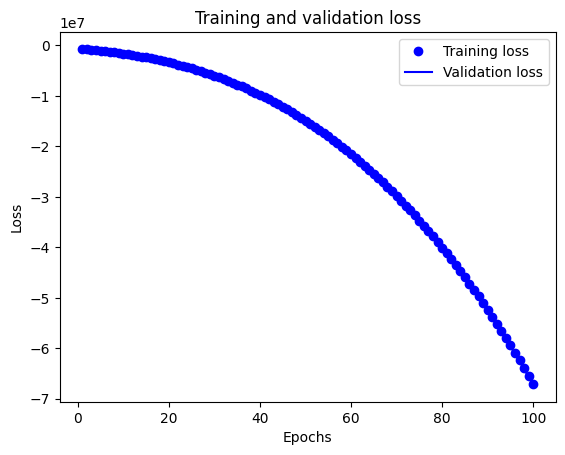

In [249]:
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1) #epochs axis values
plt.plot(epochs, loss_values, "bo", label="Training loss") #"bo" is for "blue dot."
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #"b" is for "solid blue line." / Accuracy
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

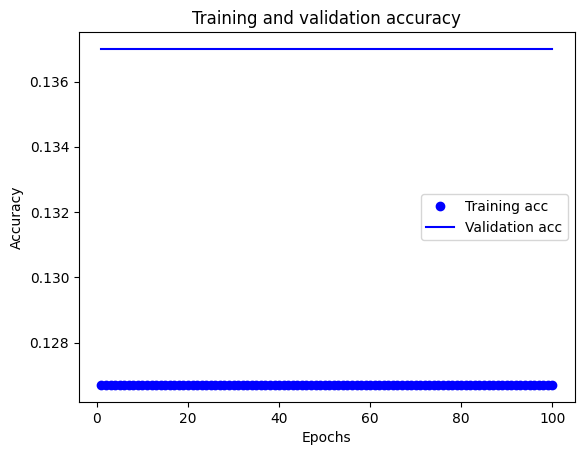

In [250]:
plt.clf() #Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [251]:
y_pred_prob= model.predict(X_test_nm) # Replace 'model' and 'X_test' with your variables

364/364 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [252]:
y_test_nm

4156     1
5915     1
25948    7
26566    7
13257    3
        ..
21224    5
12621    3
1767     0
8773     2
5279     1
Name: Zone, Length: 11648, dtype: int64

In [256]:
'''
y_pred_prob.round()
y_test_nm.round()
y_pred_prob.ravel()
y_test_nm.ravel()
'''

array([1, 1, 7, ..., 0, 2, 1])

In [259]:
y_pred_classes = (y_pred_prob > 0.5).astype(int)

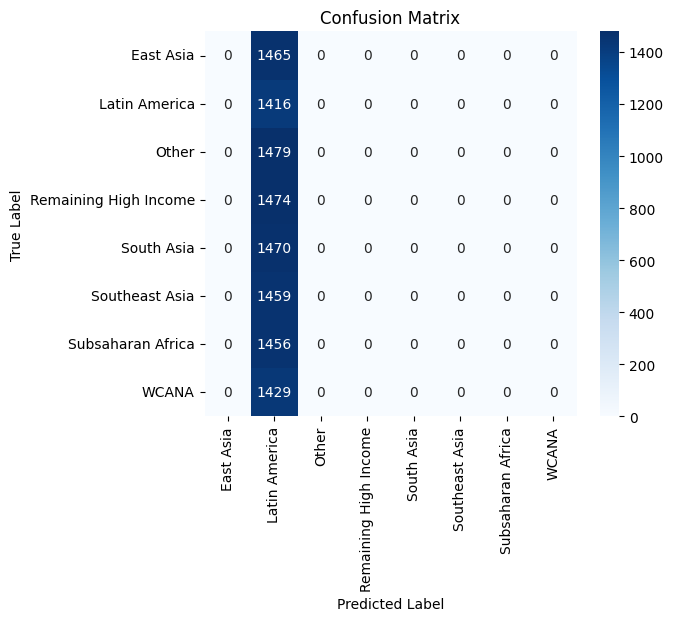

                       precision    recall  f1-score   support

            East Asia       0.00      0.00      0.00      1465
        Latin America       0.12      1.00      0.22      1416
                Other       0.00      0.00      0.00      1479
Remaining High Income       0.00      0.00      0.00      1474
           South Asia       0.00      0.00      0.00      1470
       Southeast Asia       0.00      0.00      0.00      1459
    Subsaharan Africa       0.00      0.00      0.00      1456
                WCANA       0.00      0.00      0.00      1429

             accuracy                           0.12     11648
            macro avg       0.02      0.12      0.03     11648
         weighted avg       0.01      0.12      0.03     11648



In [262]:
plt.figure(figsize=(6, 5))
conf_matrix = confusion_matrix(y_test_nm, y_pred_classes)  #  'y_test' are the true labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ], yticklabels=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Print a classification report
print(classification_report(y_test_nm, y_pred_classes, target_names=['East Asia', 'Latin America', 'Other', 'Remaining High Income','South Asia', 'Southeast Asia', 'Subsaharan Africa', 'WCANA' ]))

Visualisation error, Near Miss cannot apply to dataframe when tried to apply deep learning original methods to nearmiss.

# Discussion topics

* Which models performed the best? Were there big differences?
* What were uniquely prevalent issues with the dataset?
* Do you think it's more important to be sensitive to negativity or positivity? Do we want more positive things incorrectly marked as negative, or more negative things marked as positive?
* They all had very different training times. Which ones offer the best combination of performance and not making you wait around for an hour?
* Is 75% accuracy good?

1. Models involving decision tree, majority voting or layers performed better for this dataset than other algorithms that do not use any one of the listed features did. As seen by some models predicting with <50% accuracy.
2. Due to being a classification model with multiple categories for outputs, there were issues with classification reports for deep learning. It should also be noted huge imbalance in output data meant predictions is suxeptible to skeww and bias, meaning the model is effected by data leakage.
3. Whether an error is positively or negatively predicted is irrelevant for this dataset, as it is not a binary classification, the error could be one of 7 other categories. In the case of deep learning, the focus is on the accuracy, precision, recall and f1-score of the prediction for each correctly predicted item.
4. Random Forest Classifier had the best combination of prediction performance and training time. Performing well in all scenarios and under different sampling methods.
5. In this case, accuracy is a viable metric of consideration as a multiple category output. The aim is for each item to be presicely and uniquely identifiable. So 75% across all categories is "good". However, in the last visualisation of deep learning, when comparing one category at a time, accuracy is a less prevalent metric of consideration and does not properly highlight the nuance of the confusion matrix that f1-score does.

# References

[Classification Model Guide (geeksforgeeks)](https://www.geeksforgeeks.org/comprehensive-guide-to-classification-models-in-scikit-learn/)


[Micronutrient Dataset Source (figshare)](https://figshare.com/articles/dataset/Global_trends_in_dietary_micronutrient_supplies_and_estimated_prevalence_of_inadequate_intakes/4866869?file=8102996)

[Micronutrient Research Journal](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0175554)